## Analyse Exploratoire des Donn√©es √âtudiantes ‚Äì UCAD

###  Contexte

Ce notebook s'inscrit dans le cadre de mon stage de deux mois au sein de la **Direction des √âtudes et des Statistiques (DES)** de l‚ÄôUniversit√© Cheikh Anta Diop (UCAD), sous la supervision du Directeur de la DES et du Chef de la Division Statistiques.

L‚Äôobjectif global de ce stage est de **valoriser les donn√©es sur les effectifs** (√©tudiant) via des analyses statistiques

### Objectif du notebook

Ce notebook est consacr√© √† la **phase d‚Äôanalyse exploratoire des donn√©es (EDA)**. Elle constitue une √©tape fondamentale avant toute mod√©lisation pr√©dictive, car elle permet de :
- Comprendre la structure et la qualit√© des donn√©es disponibles,
- D√©tecter les **anomalies d√©j√† identifi√©es** par l'√©quipe,
- R√©aliser des statistiques descriptives pour faire √©merger les **tendances g√©n√©rales**,
- Inseights Pertinents
- Pr√©parer un jeu de donn√©es propre pour la suite du travail (mod√©lisation machine learning).

---

###  Donn√©es utilis√©es

Les donn√©es portent sur les effectifs √©tudiants de l‚ÄôUCAD, r√©partis par ann√©e, niveau, d√©partement, sexe, nationalit√©, etc. Elles sont actuellement **brutes** et pr√©sentent certaines **anomalies connues** (incoh√©rences de dates, doublons, valeurs manquantes, formats h√©t√©rog√®nes).

---

### Outils et technologies

Ce travail est r√©alis√© en Python, √† l‚Äôaide des biblioth√®ques suivantes :
- `pandas` / `numpy` pour le traitement des donn√©es,
- `matplotlib` / `seaborn` pour les visualisations,


---

###  √âtapes pr√©vues dans ce notebook

0. **verifier que les fichiers ont les meme colonne**
1. **Chargement et aper√ßu des donn√©es**
2. **Analyse des valeurs manquante**
3. **Donn√©es D√©mographiques**
4. **Historique Acad√©mique**
5. **Parcours Universitaire**
6. **R√©sum√© et interpr√©tations**




##### Partie 0 : verifier que les fichiers ont les meme colonne

In [4]:
#collone de reference
import pandas as pd
import glob  as glob
import os
data= pd.read_csv('C:/Users/HP/Desktop/mon_stage_senegal/data/Etudiants_2001_2024/Liste_globale_des_etudiants_tous_les_champs20232024.csv' , encoding='latin1' ,sep=';')
# Chemin vers le dossier contenant les fichiers
dossier = 'C:/Users/HP/Desktop/mon_stage_senegal/data/Etudiants_2001_2024'

colonnes_reference = set(data.columns)  # Colonnes de r√©f√©rence
fichiers_csv = glob.glob(os.path.join(dossier, '*.csv'))
#V√©rifier les colonnes de chaque fichier
for fichier in fichiers_csv:
    data = pd.read_csv(fichier, encoding='latin1', sep=';')
    colonnes_actuelles = set(data.columns)
    if colonnes_actuelles != colonnes_reference:
        print(f"Les colonnes de {os.path.basename(fichier)} sont diff√©rentes de celles du fichier de r√©f√©rence(fichier 2001-2002).")
        print(f"Colonnes manquantes dans {os.path.basename(fichier)} :", colonnes_reference - colonnes_actuelles)
        print(f"Colonnes suppl√©mentaires dans {os.path.basename(fichier)} :", colonnes_actuelles - colonnes_reference)
        
print(f"‚úÖLes colonnes des fichiers sont identiques  celles du fichier de r√©f√©rence(fichier 2001-2002).")

‚úÖLes colonnes des fichiers sont identiques  celles du fichier de r√©f√©rence(fichier 2001-2002).


observation : Tous les fichiers disposent des memes noms de colonnes, ce qui permet de les concatener directement sans difficulte. Cette homog√©n√©it√© structurelle facilite la fusion des donn√©es en un seul DataFrame global, regroupant l'ensemble des effectifs √©tudiants sur les diff√©rentes ann√©es universitaires analys√©es

### chargement et apercu des donn√©es 


In [5]:
#================concater les fichiers pour creer un dataframe complet 
if fichiers_csv:  # V√©rifier qu'il y a des fichiers CSV dans le dossier
    df_total = pd.concat(
        (pd.read_csv(fichier, encoding='latin1', sep=';', low_memory=False)
         .assign(source=os.path.basename(fichier)) for fichier in fichiers_csv),
        ignore_index=True
    )
    print("Les fichiers ont √©t√© concat√©n√©s avec succ√®s.")
else:
    print("Aucun fichier CSV trouv√© dans le dossier sp√©cifi√©.")
    
df_2023 = df_total[df_total['ANNEE_UNIVERSITAIRE'] == '2023-2024']   


Les fichiers ont √©t√© concat√©n√©s avec succ√®s.


In [6]:
# Apr√®s la concat√©nation de df_total, ajoute cette ligne :
df_total['DATE_INSCRIPTION'] = pd.to_datetime(df_total['DATE_INSCRIPTION'], dayfirst=True, errors='coerce')
df_total.head(10)


NUMERO  NUMERO_TABLE           INE NUMERO_IDENTITIFICATION      NOM  \
0  .199900UB6           NaN  X00026820131          .1218198401244       BA   
1  .199800OAE           NaN           NaN                       .    KANDE   
2  .199700H5O           NaN           NaN                       .     DIOP   
3  .199700I36           NaN           NaN                       .     DIOP   
4  .199800NC9           NaN           NaN                       .    DRAME   
5  .199900TPD           NaN           NaN                       .      BOP   
6  .199900TZS           NaN           NaN                       .   NDIAYE   
7  .199900U28           NaN           NaN                       .  BAKHOUM   
8  .1995000ZR           NaN           NaN                       .    KEITA   
9  .19950009W           NaN           NaN                       .    NDOUR   

           PRENOM DATE_DE_NAISSANCE LIEU_DE_NAISSANCE  \
0        Alassane        03/05/1967          TENEFOUL   
1        Mountaga        29/10/1977             KOLDA   
2   Amadou Lamine        29/12/1974             MEKHE   
3             Awa        27/03/1971             DAKAR   
4  Mamadou Lamine        09/03/1979             DAKAR   
5           Nd√®ye        03/11/1977             DAKAR   
6         Mari√®me        13/05/1977             DAKAR   
7      Nd√©ye Nafi        09/04/1977             DAKAR   
8    Ndeye Ndiate        03/03/1975             DAKAR   
9      Diam√© Nd√©b        10/10/1974           BACOBOF   

        MAIL_INSTITUTIONNEL SEXE  ... ANNEE_UNIVERSITAIRE  TYPE_FORMATION  \
0  alassane5.ba@ucad.edu.sn    M  ...           2001-2002               I   
1                       NaN    M  ...           2001-2002               I   
2                       NaN    M  ...           2001-2002               I   
3                       NaN    F  ...           2001-2002               I   
4                       NaN    M  ...           2001-2002               I   
5                       NaN    F  ...           2001-2002               I   
6                       NaN    F  ...           2001-2002               I   
7                       NaN    F  ...           2001-2002               I   
8                       NaN    F  ...           2001-2002               I   
9                       NaN    M  ...           2001-2002               I   

  CODE_NIVEAU            NIVEAU DATE_INSCRIPTION NIVEAU LMD  \
0           6    Sixi√®me Ann√©e        2001-12-11        NaN   
1           4  Quatri√®me Ann√©e        2001-12-12        NaN   
2           4  Quatri√®me Ann√©e        2001-11-10        NaN   
3           5  Cinqui√®me Ann√©e        2002-02-01         M2   
4           4  Quatri√®me Ann√©e        2001-11-19        NaN   
5           1   Premi√®re Ann√©e        2002-03-07         L1   
6           2   Deuxi√®me Ann√©e        2001-12-04        NaN   
7           2   Deuxi√®me Ann√©e        2001-11-14        NaN   
8           4  Quatri√®me Ann√©e        2002-01-17         M1   
9           3  Troisi√®me Ann√©e        2001-12-04        NaN   

  NIVEAU LMD ET NON LMD    SYSTEME  \
0                    6A  Classique   
1                    4A  Classique   
2                    4A  Classique   
3                    M2        LMD   
4                    4A  Classique   
5                    L1        LMD   
6                    2A  Classique   
7                    2A  Classique   
8                    M1        LMD   
9                    3A  Classique   

                               DEPARTEMENT FORMATION  \
0                         Math√©matiques-Informatique   
1                                        G√©nie Civil   
2                                           Economie   
3  Institut de Formation en Administration et Cr√©...   
4                                           Economie   
5  Institut de Formation en Administration et Cr√©...   
6                                            Gestion   
7                                            Gestion   
8                         

In [7]:
df_total.columns

Index(['NUMERO', 'NUMERO_TABLE', 'INE', 'NUMERO_IDENTITIFICATION', 'NOM',
       'PRENOM', 'DATE_DE_NAISSANCE', 'LIEU_DE_NAISSANCE',
       'MAIL_INSTITUTIONNEL', 'SEXE', 'MENTION_BACC', 'ANNEE_BACC',
       'PAYS_DE_NAISSANCE', 'NATIONALITE', 'SERIE_BACC', 'REGION_DE_NAISSANCE',
       'ETABLISSMENT_CODE', 'ETABLISSEMENT', 'NIVEAU_SECTION',
       'SIGLE_NIVEAU_SECTION', 'COHORTE', 'ETAT_INSCRIPTION',
       'ANNEE_INSCRIPTION', 'ANNEE_UNIVERSITAIRE', 'TYPE_FORMATION',
       'CODE_NIVEAU', 'NIVEAU', 'DATE_INSCRIPTION', 'NIVEAU LMD',
       'NIVEAU LMD ET NON LMD', 'SYSTEME', 'DEPARTEMENT FORMATION', 'source'],
      dtype='object')

In [8]:
df_2023.info()  # Afficher les premi√®res lignes du DataFrame

<class 'pandas.core.frame.DataFrame'>
Index: 88946 entries, 1473344 to 1562289
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NUMERO                   88946 non-null  object 
 1   NUMERO_TABLE             51669 non-null  float64
 2   INE                      75953 non-null  object 
 3   NUMERO_IDENTITIFICATION  88946 non-null  object 
 4   NOM                      88946 non-null  object 
 5   PRENOM                   88946 non-null  object 
 6   DATE_DE_NAISSANCE        88946 non-null  object 
 7   LIEU_DE_NAISSANCE        88946 non-null  object 
 8   MAIL_INSTITUTIONNEL      88881 non-null  object 
 9   SEXE                     88946 non-null  object 
 10  MENTION_BACC             88926 non-null  object 
 11  ANNEE_BACC               88926 non-null  float64
 12  PAYS_DE_NAISSANCE        88946 non-null  object 
 13  NATIONALITE              88946 non-null  object 
 14  SERIE_BACC         

observation : 
Apres avoir fusionne les fichiers CSV correspondant aux ann√©es universitaires de 2001 a 2025, nous avons obtenu un DataFrame contenant environ **1595039** et **32 colonnes**. Voici les premi√®res observations g√©n√©rales sur la structure et le contenu des donn√©es :

- Les noms de colonnes sont globalement coh√©rents entre les fichiers, bien que certains puissent pr√©senter des **variations de casse, d'espacement ou de format** qu'il faudra harmoniser (ex. "niveau lmd", "niveau LMD ", etc.).
- Certaines colonnes semblent **redondantes** ou peu informatives √† ce stade (ex. colonnes vides). 

- La majorit√© des colonnes sont de type `object` (chaines de caracteres), y compris des colonnes num√©riques mal typ√©es (ex. "ann√©e de bac", "niveau", "num√©ro").
- Certaines colonnes devraient id√©alement √™tre converties en types num√©riques (`int`, `float`) ou en dates (`datetime`) pour permettre des traitements plus pr√©cis. 
- Plusieurs colonnes pr√©sentent **un nombre significatif de valeurs manquantes**, notamment Les informations sur le **d√©partement**, **la s√©rie de bac**, **la nationalit√©** ou **la structure d‚Äôaccueil** des colonnes comme `"niveau LMD"` ou `"code facult√©"` peuvent contenir des **valeurs vides ou 'inconnu'**.

##### Partie1 :  Analyse des valeurs manquantes et anomalies connus

In [9]:

import matplotlib.pyplot as plt
from tabulate import tabulate
#============detecter les valeurs manquantes ===============
valeurs_manquantes = df_2023.isnull().sum()
pourcentage_valeurs_manquantes = (valeurs_manquantes / len(df_2023)) * 100

#tableau recapitulatif des valeurs manquantes
tableau_valeurs_manquantes = pd.DataFrame({
    'Colonnes' : df_total.columns,
    'Valeurs manquantes': valeurs_manquantes,
    'Pourcentage': pourcentage_valeurs_manquantes
    }) .sort_values(by='Valeurs manquantes', ascending=False) 

#les colonnes critiques avec plus de 50% de valeurs manquantes
colonnes_critique = tableau_valeurs_manquantes[tableau_valeurs_manquantes['Pourcentage'] > 0]

#visualisation des valeurs manquantes
print("Tableau r√©capitulatif des valeurs manquantes :")
print(tabulate(colonnes_critique, headers='keys', tablefmt='psql', showindex=False))




Tableau r√©capitulatif des valeurs manquantes :
+---------------------+----------------------+---------------+
| Colonnes            |   Valeurs manquantes |   Pourcentage |
|---------------------+----------------------+---------------|
| COHORTE             |                75789 |    85.2079    |
| NUMERO_TABLE        |                37277 |    41.9097    |
| NIVEAU LMD          |                15719 |    17.6725    |
| INE                 |                12993 |    14.6077    |
| REGION_DE_NAISSANCE |                 4602 |     5.17393   |
| SERIE_BACC          |                 1265 |     1.42221   |
| MAIL_INSTITUTIONNEL |                   65 |     0.073078  |
| ANNEE_BACC          |                   20 |     0.0224856 |
| MENTION_BACC        |                   20 |     0.0224856 |
+---------------------+----------------------+---------------+


## Partie1 :Donn√©es D√©mographiques

#### evolution des etudiants de 2001 a 2025

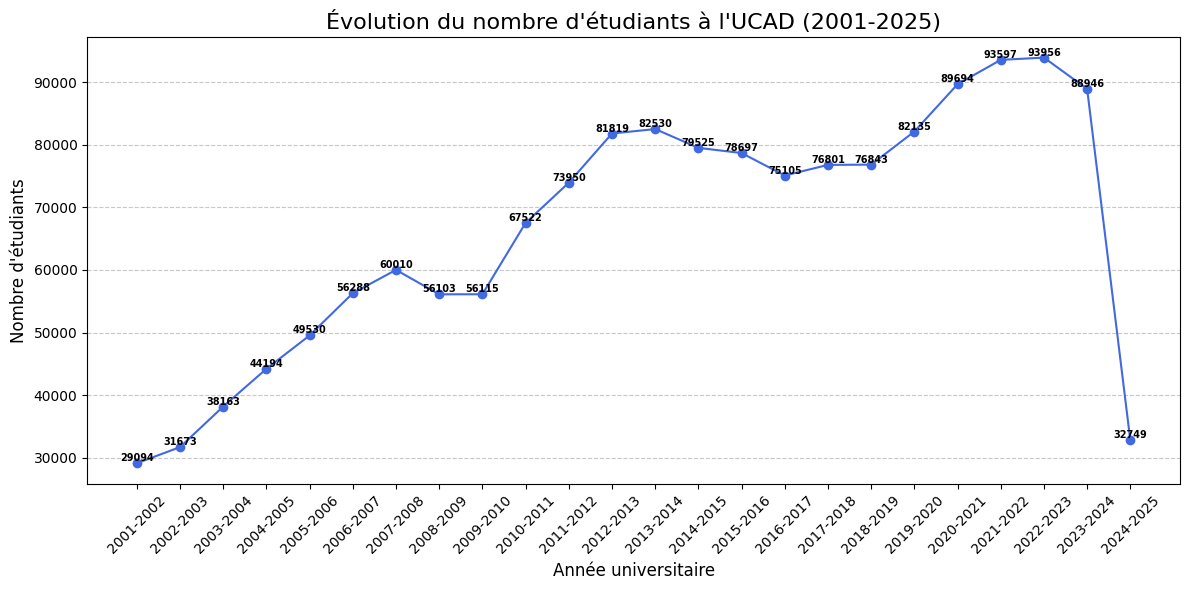

In [10]:
# Evolution du nombre d'√©tudiants de 2001 √† 2025 (courbe) avec valeurs exactes sur le graphique
import matplotlib.pyplot as plt

evolution = df_total.groupby('ANNEE_UNIVERSITAIRE')['NUMERO'].count().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(evolution['ANNEE_UNIVERSITAIRE'], evolution['NUMERO'], marker='o', color='royalblue')
for i, val in enumerate(evolution['NUMERO']):
    plt.text(evolution['ANNEE_UNIVERSITAIRE'][i], val, str(val), ha='center', va='bottom', fontsize=7, fontweight='bold')

plt.title("√âvolution du nombre d'√©tudiants √† l'UCAD (2001-2025)", fontsize=16)
plt.xlabel("Ann√©e universitaire", fontsize=12)
plt.ylabel("Nombre d'√©tudiants", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

La courbe montre une croissance r√©guliere du nombre d'√©tudiants √† l'UCAD de 2001 √† 2023, avec un pic autour de 2022-2023. On observe une forte baisse en 2024-2025 Globalement, l'universit√© connait une forte augmentation de ses effectifs sur la p√©riode √©tudi√©e

#### R√©partition en fonction de l'age

C:\Users\HP\AppData\Local\Temp\ipykernel_1888\1276719454.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['TRANCHE_AGE'] = pd.cut(df_total['AGE_INSCRIPTION'], bins=bins, labels=labels, right=False)


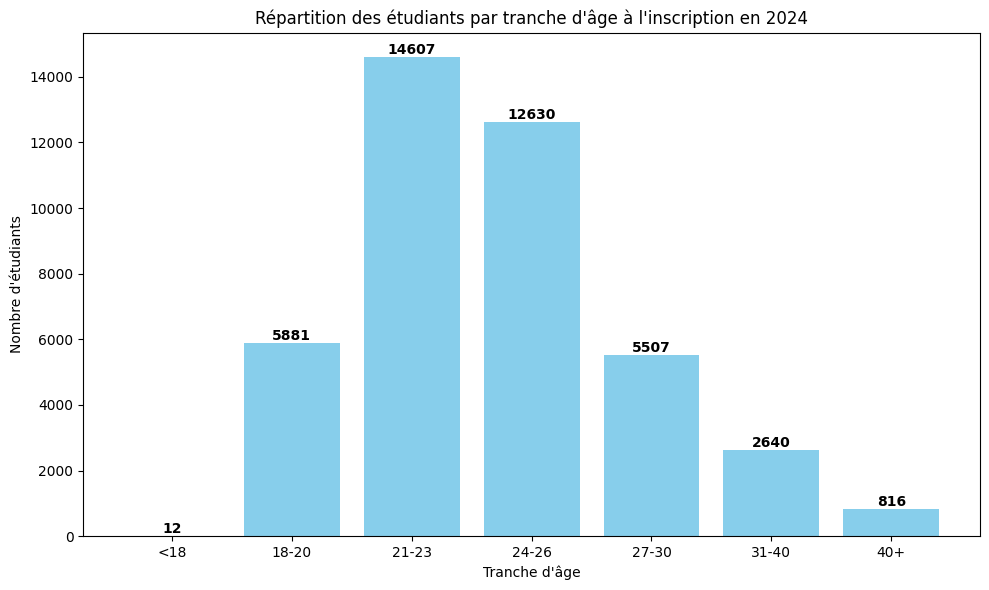

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# S'assurer que les colonnes sont bien au format datetime
df_total['DATE_DE_NAISSANCE'] = pd.to_datetime(df_total['DATE_DE_NAISSANCE'], errors='coerce')
df_total['DATE_INSCRIPTION'] = pd.to_datetime(df_total['DATE_INSCRIPTION'], errors='coerce')

# Calculer l'√¢ge √† l'inscription
df_total['AGE_INSCRIPTION'] = (df_total['DATE_INSCRIPTION'] - df_total['DATE_DE_NAISSANCE']).dt.days // 365

# D√©finir les tranches d'√¢ge
bins = [0, 17, 20, 23, 26, 30, 40, 100]
labels = ['<18', '18-20', '21-23', '24-26', '27-30', '31-40', '40+']
df_2023['TRANCHE_AGE'] = pd.cut(df_total['AGE_INSCRIPTION'], bins=bins, labels=labels, right=False)

# Compter le nombre d'√©tudiants par tranche d'√¢ge
age_counts = df_2023['TRANCHE_AGE'].value_counts().sort_index()

# Afficher le diagramme
plt.figure(figsize=(10, 6))
bars = plt.bar(age_counts.index, age_counts.values, color='skyblue')
plt.title("R√©partition des √©tudiants par tranche d'√¢ge √† l'inscription en 2024")
plt.xlabel("Tranche d'√¢ge")
plt.ylabel("Nombre d'√©tudiants")

# Ajouter les valeurs exactes sur les barres
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()),
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

La majorit√© des √©tudiants s'inscrivent √† l'UCAD entre 21 et 26 ans, avec un pic dans la tranche 21-23 ans. Les inscriptions restent possibles √† tout age, mais deviennent plus rares apr√®s 30 ans.

#### R√©partition par sexe


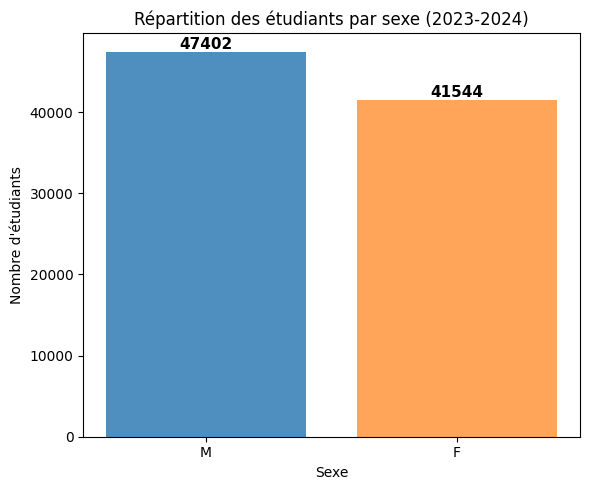

In [12]:
import matplotlib.pyplot as plt

# R√©partition par sexe pour l'ann√©e 2023-2024
sexe_counts = df_2023['SEXE'].value_counts()

plt.figure(figsize=(6, 5))
bars = plt.bar(sexe_counts.index, sexe_counts.values, color=['#4F8FC0', '#FFA559'])
plt.title("R√©partition des √©tudiants par sexe (2023-2024)")
plt.xlabel("Sexe")
plt.ylabel("Nombre d'√©tudiants")

# Ajouter les valeurs exactes sur les barres
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()),
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

## Historique Acad√©mique

In [13]:
# --- Mention au Bac normalis√©e (encodage ordinal) ---
#prendre tous sauf les mentions mauvaises
menttion_valide = ['PA', 'AB', 'BI', 'TB']
df_2023 = df_2023[df_2023['MENTION_BACC'].str.upper().isin(menttion_valide)]

mention_map = {
    'PA': 'Passable',
    'AB': "Assez Bien",
    'BI': 'Bien',
    'TB': 'Tres Bien'
}
df_2023['MENTION_BAC_NORM'] = df_2023['MENTION_BACC'].str.upper().map(mention_map)

# --- D√©lai Bac-Universit√© (diff√©rence entre ANNEE_BACC et ANNEE_INSCRIPTION) ---
df_2023['ANNEE_BACC'] = pd.to_numeric(df_2023['ANNEE_BACC'], errors='coerce')
df_2023['ANNEE_INSCRIPTION'] = pd.to_numeric(df_2023['ANNEE_INSCRIPTION'], errors='coerce')
df_2023['DELAI_BAC_UNIV'] = df_2023['ANNEE_INSCRIPTION'] - df_2023['ANNEE_BACC']

# --- Indicateur de s√©rie Bac (scientifique, litt√©raire, tertiaire) ---
def serie_bac_type(serie):
    s = str(serie).upper().strip()
    if any(x in s for x in ['S', 'SCI', 'D', 'E', 'F6', 'F4', 'F5']):
        return 'Scientifique'
    elif any(x in s for x in ['L', 'A', 'AR', 'L1', 'L2', 'L\'', 'L ']):
        return 'Litt√©raire'
    elif any(x in s for x in ['G', 'T', 'STG', 'S1', 'S2', 'S3', 'S4', 'S5']):
        return 'Tertiaire'
    else:
        return 'Autre'

df_2023['BAC_TYPE'] = df_2023['SERIE_BACC'].apply(serie_bac_type)



#### Graphe : R√©partition des mentions au Bac 

C:\Users\HP\AppData\Local\Temp\ipykernel_1888\3053612067.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mention_counts.index, y=mention_counts.values, palette='viridis')


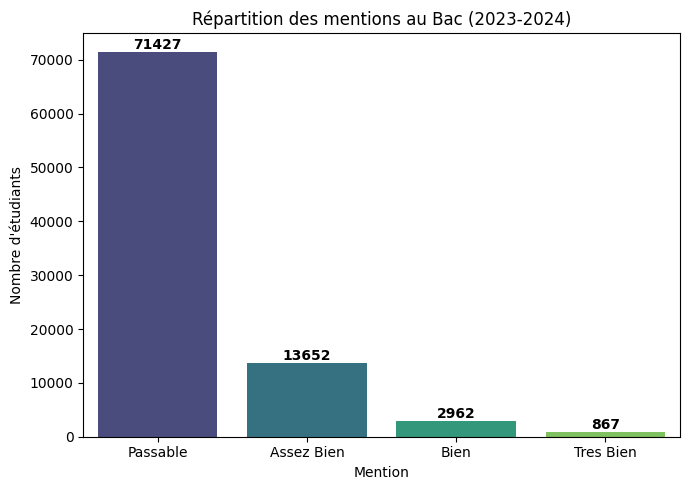

In [14]:

import seaborn as sns
mention_order = ['Passable', 'Assez Bien', 'Bien', 'Tres Bien']
mention_counts = df_2023['MENTION_BAC_NORM'].value_counts().reindex(mention_order)

plt.figure(figsize=(7, 5))
sns.barplot(x=mention_counts.index, y=mention_counts.values, palette='viridis')
plt.title("R√©partition des mentions au Bac (2023-2024)")
plt.xlabel("Mention")
plt.ylabel("Nombre d'√©tudiants")
for i, v in enumerate(mention_counts.values):
    if pd.notnull(v):
        plt.text(i, v + 50, int(v), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

#### R√©partition par type de s√©rie Bac

C:\Users\HP\AppData\Local\Temp\ipykernel_1888\956417470.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bac_type_counts.index, y=bac_type_counts.values, palette='Set2')


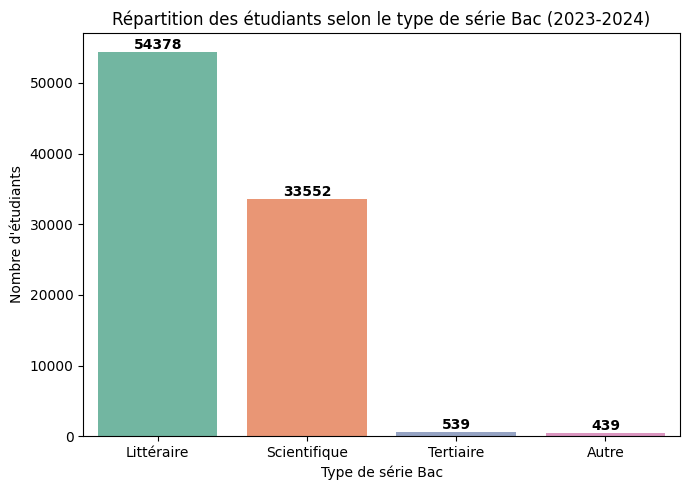

In [15]:
bac_type_counts = df_2023['BAC_TYPE'].value_counts()
plt.figure(figsize=(7, 5))
sns.barplot(x=bac_type_counts.index, y=bac_type_counts.values, palette='Set2')
plt.title("R√©partition des √©tudiants selon le type de s√©rie Bac (2023-2024)")
plt.xlabel("Type de s√©rie Bac")
plt.ylabel("Nombre d'√©tudiants")
for i, v in enumerate(bac_type_counts.values):
    plt.text(i, v + 50, int(v), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

## Parcours Universitaire

#### Progression acad√©mique (√©volution du NIVEAU LMD sur les ann√©es)

### Objectif : Comprendre les facteurs qui expliquent le redoublement en L1 √† l'UCAD de 2001 √† 2024, en exploitant toutes les donn√©es disponibles.

In [16]:
# afficher tous les colonnes
pd.set_option('display.max_columns', None)
df_total.head()

NUMERO  NUMERO_TABLE           INE NUMERO_IDENTITIFICATION    NOM  \
0  .199900UB6           NaN  X00026820131          .1218198401244     BA   
1  .199800OAE           NaN           NaN                       .  KANDE   
2  .199700H5O           NaN           NaN                       .   DIOP   
3  .199700I36           NaN           NaN                       .   DIOP   
4  .199800NC9           NaN           NaN                       .  DRAME   

           PRENOM DATE_DE_NAISSANCE LIEU_DE_NAISSANCE  \
0        Alassane        1967-03-05          TENEFOUL   
1        Mountaga               NaT             KOLDA   
2   Amadou Lamine               NaT             MEKHE   
3             Awa               NaT             DAKAR   
4  Mamadou Lamine        1979-09-03             DAKAR   

        MAIL_INSTITUTIONNEL SEXE MENTION_BACC  ANNEE_BACC PAYS_DE_NAISSANCE  \
0  alassane5.ba@ucad.edu.sn    M           PA      1987.0           S√©n√©gal   
1                       NaN    M           PA      1998.0           S√©n√©gal   
2                       NaN    M           PA      1997.0           S√©n√©gal   
3                       NaN    F           PA      1995.0           S√©n√©gal   
4                       NaN    M           PA      1998.0           S√©n√©gal   

   NATIONALITE SERIE_BACC REGION_DE_NAISSANCE ETABLISSMENT_CODE  \
0  S√©n√©galaise          C            Diourbel               FST   
1  S√©n√©galaise         S2               Kolda               ESP   
2  S√©n√©galaise          D                 NaN             FASEG   
3  S√©n√©galaise          B                 NaN             FASEG   
4  S√©n√©galaise         S2                 NaN             FASEG   

                                    ETABLISSEMENT  \
0              Facult√© des Sciences et Techniques   
1                  Ecole Sup√©rieure Polytechnique   
2  Facult√© des Sciences Economiques et de Gestion   
3  Facult√© des Sciences Economiques et de Gestion   
4  Facult√© des Sciences Economiques et de Gestion   

                                      NIVEAU_SECTION  \
0  Dipl√¥me d'Etudes Approfondies Alg√®bre Commutative   
1  Deuxi√®me Ann√©e du Dipl√¥me d'Ing√©nieur de Conce...   
2  Ma√Ætrise de Sciences Economiques option Analys...   
3     Deuxi√®me Ann√©e Ma√Ætrise en Sciences de Gestion   
4  Ma√Ætrise de Sciences Economiques option Analys...   

                                SIGLE_NIVEAU_SECTION COHORTE ETAT_INSCRIPTION  \
0  Dipl√¥me d'Etudes Approfondies Alg√®bre Commutative     NaN       Inscrit(e)   
1  Deuxi√®me Ann√©e du Dipl√¥me d'Ing√©nieur de Conce...     NaN       Inscrit(e)   
2  Ma√Ætrise de Sciences Economiques option Analys...     NaN       Inscrit(e)   
3     Deuxi√®me Ann√©e Ma√Ætrise en Sciences de Gestion     NaN       Inscrit(e)   
4  Ma√Ætrise de Sciences Economiques option Analys...     NaN       Inscrit(e)   

   ANNEE_INSCRIPTION ANNEE_UNIVERSITAIRE TYPE_FORMATION  CODE_NIVEAU  \
0               2002           2001-2002              I            6   
1               2002           2001-2002              I            4   
2               2002           2001-2002              I            4   
3               2002           2001-2002              I            5   
4               2002           2001-2002              I            4   

             NIVEAU DATE_INSCRIPTION NIVEAU LMD NIVEAU LMD ET NON LMD  \
0    Sixi√®me Ann√©e        2001-12-11        NaN                    6A   
1  Quatri√®me Ann√©e        2001-12-12        NaN                    4A   
2  Quatri√®me Ann√©e        2001-11-10        NaN                    4A   
3  Cinqui√®me Ann√©e        2002-02-01         M2                    M2   
4  Quatri√®me Ann√©e        2001-11-19        NaN                    4A   

     SYSTEME                              DEPARTEMENT FORMATION  \
0  Classique                         Math√©matiques-Informatique   
1  Classique                                        G√©nie Civil   
2  Classique                                          

In [17]:
#les etudiants inscrit seulement en L1 ou 1A 
df_l1 = df_total[df_total['NIVEAU LMD ET NON LMD'].str.contains('L1|1A', na=False)].copy()
df_l1.shape  

#Compter le nombre d'ann√©es universitaires diff√©rentes en L1 pour chaque √©tudiant
compte_l1 = (
    df_l1.groupby('NUMERO')['ANNEE_UNIVERSITAIRE']
    .nunique()
    .reset_index()
    .rename(columns={'ANNEE_UNIVERSITAIRE': 'nb_L1'})
)
# 3. Cr√©er la colonne "Redouble_L1"
compte_l1['Redouble_L1'] = (compte_l1['nb_L1'] > 1).astype(int)

# 4. Fusionner cette information avec ton DataFrame principal
df_total = df_total.merge(compte_l1[['NUMERO', 'Redouble_L1']], how='left', on='NUMERO')

# 5. Remplir les valeurs manquantes (√©tudiants jamais en L1)
df_total['Redouble_L1'] = df_total['Redouble_L1'].fillna(0)




In [18]:
taux_redoublement = df_total['Redouble_L1'].mean()
print(f"Taux global de redoublement en L1 : {taux_redoublement:.2%}")

Taux global de redoublement en L1 : 37.71%


harmoniser le dataframe

In [19]:
# --- Mention au Bac normalis√©e (encodage ordinal) ---
#prendre tous sauf les mentions mauvaises
menttion_valide = ['PA', 'AB', 'BI', 'TB']
df_total = df_total[df_total['MENTION_BACC'].str.upper().isin(menttion_valide)]

mention_map = {
    'PA': 'Passable',
    'AB': "Assez Bien",
    'BI': 'Bien',
    'TB': 'Tres Bien'
}
df_total['MENTION_BAC_NORM'] = df_total['MENTION_BACC'].str.upper().map(mention_map)


# --- Indicateur de s√©rie Bac (scientifique, litt√©raire, tertiaire) ---
def serie_bac_type(serie):
    s = str(serie).upper().strip()
    if any(x in s for x in ['S', 'SCI', 'D', 'E', 'F6', 'F4', 'F5']):
        return 'Scientifique'
    elif any(x in s for x in ['L', 'A', 'AR', 'L1', 'L2', 'L\'', 'L ']):
        return 'Litt√©raire'
    elif any(x in s for x in ['G', 'T', 'STG', 'S1', 'S2', 'S3', 'S4', 'S5']):
        return 'Tertiaire'
    else:
        return 'Autre'

df_total['BAC_TYPE'] = df_total['SERIE_BACC'].apply(serie_bac_type)

taux de redoublement par sexe ,  Mention du Bac , S√©rie du Bac ,  R√©gion/Pays d‚Äôorigine

In [20]:



taux_par_sexe = df_total.groupby('SEXE')['Redouble_L1'].mean()
taux_par_mention = df_total.groupby('MENTION_BAC_NORM')['Redouble_L1'].mean()
taux_par_serie = df_total.groupby('BAC_TYPE')['Redouble_L1'].mean()

# Prendre les r√©gions de naissance non vides 
regions_non_vides = df_total['REGION_DE_NAISSANCE'].dropna()
taux_par_region = df_total.groupby('REGION_DE_NAISSANCE')['Redouble_L1'].mean()


C:\Users\HP\AppData\Local\Temp\ipykernel_1888\1274054844.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taux_par_sexe.index, y=taux_par_sexe.values, palette='Set2')


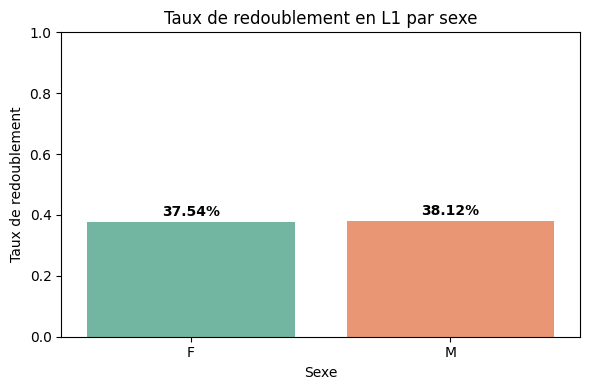

C:\Users\HP\AppData\Local\Temp\ipykernel_1888\1274054844.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taux_par_mention.index, y=taux_par_mention.values, palette='Set1')


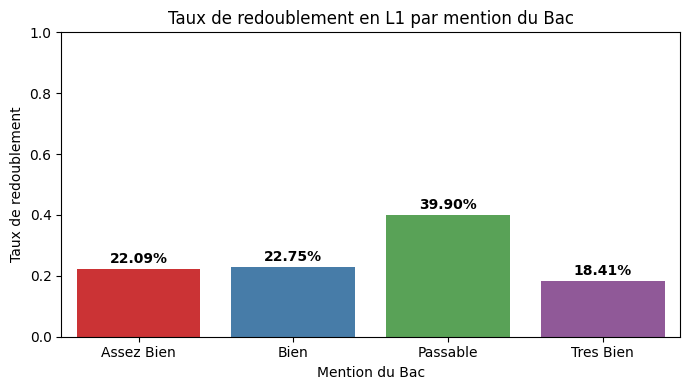

C:\Users\HP\AppData\Local\Temp\ipykernel_1888\1274054844.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taux_par_serie.index, y=taux_par_serie.values, palette='Set3')


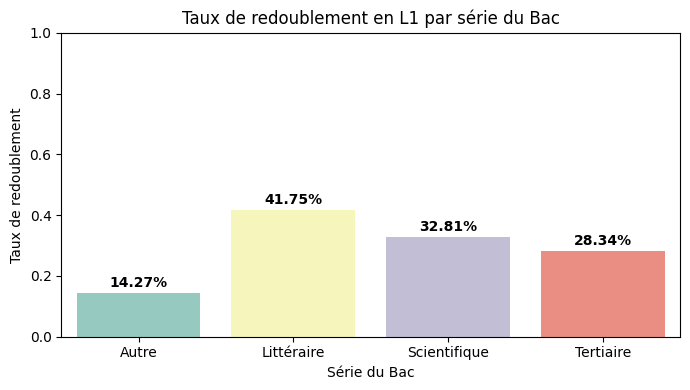

C:\Users\HP\AppData\Local\Temp\ipykernel_1888\1274054844.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_regions.index, y=top_regions.values, palette='Blues_r')


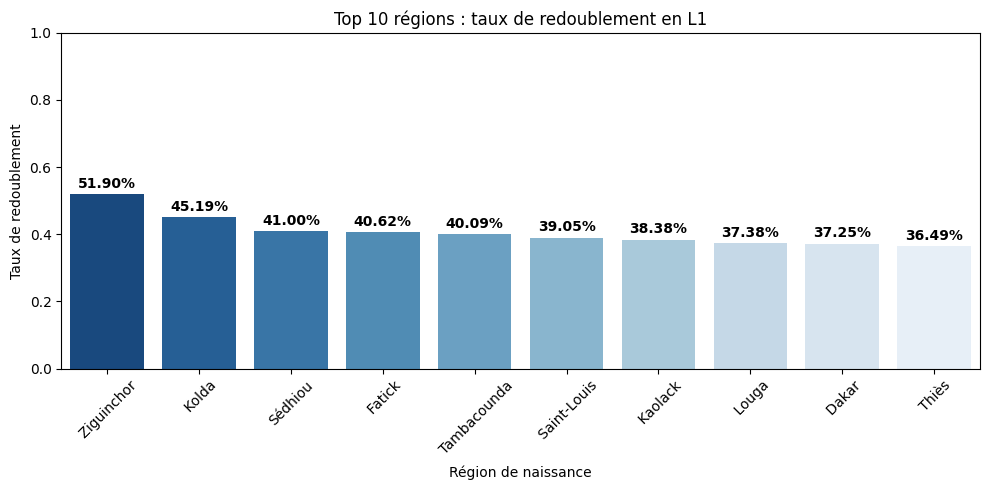

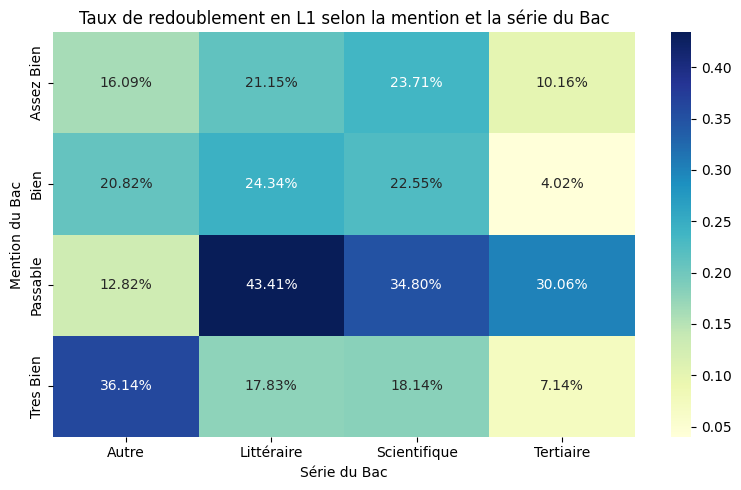

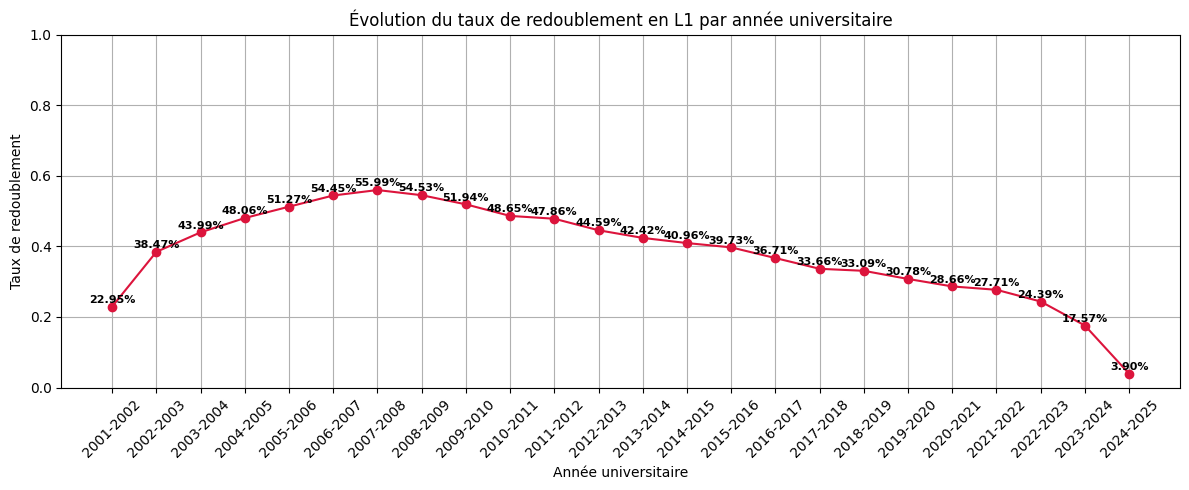

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Barplots pour comparer les taux ---

# Sexe
plt.figure(figsize=(6,4))
sns.barplot(x=taux_par_sexe.index, y=taux_par_sexe.values, palette='Set2')
plt.title("Taux de redoublement en L1 par sexe")
plt.ylabel("Taux de redoublement")
plt.xlabel("Sexe")
plt.ylim(0, 1)
for i, v in enumerate(taux_par_sexe.values):
    plt.text(i, v + 0.01, f"{v:.2%}", ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

# Mention du Bac
plt.figure(figsize=(7,4))
sns.barplot(x=taux_par_mention.index, y=taux_par_mention.values, palette='Set1')
plt.title("Taux de redoublement en L1 par mention du Bac")
plt.ylabel("Taux de redoublement")
plt.xlabel("Mention du Bac")
plt.ylim(0, 1)
for i, v in enumerate(taux_par_mention.values):
    plt.text(i, v + 0.01, f"{v:.2%}", ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

# S√©rie du Bac
plt.figure(figsize=(7,4))
sns.barplot(x=taux_par_serie.index, y=taux_par_serie.values, palette='Set3')
plt.title("Taux de redoublement en L1 par s√©rie du Bac")
plt.ylabel("Taux de redoublement")
plt.xlabel("S√©rie du Bac")
plt.ylim(0, 1)
for i, v in enumerate(taux_par_serie.values):
    plt.text(i, v + 0.01, f"{v:.2%}", ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

# R√©gion de naissance (top 10)
top_regions = taux_par_region.sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_regions.index, y=top_regions.values, palette='Blues_r')
plt.title("Top 10 r√©gions : taux de redoublement en L1")
plt.ylabel("Taux de redoublement")
plt.xlabel("R√©gion de naissance")
plt.ylim(0, 1)
plt.xticks(rotation=45)
for i, v in enumerate(top_regions.values):
    plt.text(i, v + 0.01, f"{v:.2%}", ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

# --- Heatmap croisement mention/s√©rie du Bac ---
table_croisee = pd.crosstab(df_total['MENTION_BAC_NORM'], df_total['BAC_TYPE'], values=df_total['Redouble_L1'], aggfunc='mean')
plt.figure(figsize=(8,5))
sns.heatmap(table_croisee, annot=True, fmt=".2%", cmap="YlGnBu")
plt.title("Taux de redoublement en L1 selon la mention et la s√©rie du Bac")
plt.ylabel("Mention du Bac")
plt.xlabel("S√©rie du Bac")
plt.tight_layout()
plt.show()

# --- Courbe d‚Äô√©volution du taux de redoublement par ann√©e universitaire ---
taux_par_annee = df_total.groupby('ANNEE_UNIVERSITAIRE')['Redouble_L1'].mean()
plt.figure(figsize=(12,5))
plt.plot(taux_par_annee.index, taux_par_annee.values, marker='o', color='crimson')
for i, v in enumerate(taux_par_annee.values):
    plt.text(i, v + 0.005, f"{v:.2%}", ha='center', va='bottom', fontweight='bold', fontsize=8)
plt.title("√âvolution du taux de redoublement en L1 par ann√©e universitaire")
plt.xlabel("Ann√©e universitaire")
plt.ylabel("Taux de redoublement")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

test statistique

In [22]:
#test statistique pour confirmer les diff√©rences de taux de redoublement

from scipy.stats import chi2_contingency

# Test du chi2 pour le lien entre le sexe et le redoublement
table_sexe = pd.crosstab(df_total['SEXE'], df_total['Redouble_L1'])
chi2, p_sexe, dof, expected = chi2_contingency(table_sexe)
print("p-value (sexe vs redoublement):", p_sexe)
if p_sexe < 0.05:
    print("‚Üí Il existe une association significative entre le sexe et le redoublement en L1.")
else:
    print("‚Üí Pas d'association significative entre le sexe et le redoublement en L1.")

# Test du chi2 pour le lien entre la mention du Bac et le redoublement
table_mention = pd.crosstab(df_total['MENTION_BAC_NORM'], df_total['Redouble_L1'])
chi2, p_mention, dof, expected = chi2_contingency(table_mention)
print("p-value (mention Bac vs redoublement):", p_mention)
if p_mention < 0.05:
    print("‚Üí Il existe une association significative entre la mention du Bac et le redoublement en L1.")
else:
    print("‚Üí Pas d'association significative entre la mention du Bac et le redoublement en L1.")

# Test du chi2 pour le lien entre la s√©rie du Bac et le redoublement
table_serie = pd.crosstab(df_total['BAC_TYPE'], df_total['Redouble_L1'])
chi2, p_serie, dof, expected = chi2_contingency(table_serie)
print("p-value (s√©rie Bac vs redoublement):", p_serie)
if p_serie < 0.05:
    print("‚Üí Il existe une association significative entre la s√©rie du Bac et le redoublement en L1.")
else:
    print("‚Üí Pas d'association significative entre la s√©rie du Bac et le redoublement en L1.")

# Test du chi2 pour le lien entre la r√©gion de naissance et le redoublement (top 10 r√©gions)
top10_regions = df_total['REGION_DE_NAISSANCE'].value_counts().head(10).index
table_region = pd.crosstab(df_total[df_total['REGION_DE_NAISSANCE'].isin(top10_regions)]['REGION_DE_NAISSANCE'],
                           df_total[df_total['REGION_DE_NAISSANCE'].isin(top10_regions)]['Redouble_L1'])
chi2, p_region, dof, expected = chi2_contingency(table_region)
print("p-value (r√©gion naissance vs redoublement):", p_region)
if p_region < 0.05:
    print("‚Üí Il existe une association significative entre la r√©gion de naissance et le redoublement en L1 (top 10 r√©gions).")
else:
    print("‚Üí Pas d'association significative entre la r√©gion de naissance et le redoublement en L1 (top 10 r√©gions).")
# ...existing code...

p-value (sexe vs redoublement): 2.0155249025514044e-13
‚Üí Il existe une association significative entre le sexe et le redoublement en L1.
p-value (mention Bac vs redoublement): 0.0
‚Üí Il existe une association significative entre la mention du Bac et le redoublement en L1.
p-value (s√©rie Bac vs redoublement): 0.0
‚Üí Il existe une association significative entre la s√©rie du Bac et le redoublement en L1.
p-value (r√©gion naissance vs redoublement): 0.0
‚Üí Il existe une association significative entre la r√©gion de naissance et le redoublement en L1 (top 10 r√©gions).


Conclusion

L'analyse statistique des donn√©es UCAD met en √©vidence plusieurs points cl√©s concernant le redoublement en L1‚ÄØ:

- Facteurs associ√©s‚ÄØ: Les tests du chi2 confirment que la mention au Bac, la s√©rie du Bac et la r√©gion de naissance sont significativement associ√©es au risque de redoublement en L1. Les √©tudiants issus des s√©ries litt√©raires ou ayant obtenu la mention Passable‚ÄØ sont particuli√®rement expos√©s.
- √âvolution temporelle‚ÄØ: Le taux de redoublement en L1 a fortement diminu√© au fil des ann√©es, passant de plus de 50‚ÄØ% √† moins de 25‚ÄØ% en 2024-2025, traduisant probablement des r√©formes ou un meilleur accompagnement.
- In√©galit√©s territoriales‚ÄØ: Certaines r√©gions affichent des taux de redoublement nettement sup√©rieurs √† la moyenne, ce qui sugg√®re des disparit√©s d'acc√®s ou de pr√©paration √† l'enseignement sup√©rieur.
Aucune diff√©rence significative selon le sexe‚ÄØ: Le redoublement touche de fa√ßon similaire les hommes et les femmes.

### Comprendre et pr√©venir le d√©crochage universitaire √† l‚ÄôUCAD

In [23]:
#les etudiants inscrit seulement en L1 et qu'on ne voit plus dans la base de donn√©es
df_l1 = df_total[df_total['NIVEAU LMD ET NON LMD'].str.contains('L1|1A', na=False)].copy()
df_l1.shape

(635636, 37)

on considre comme non reussi tout etudiant dont le dernier niveau n'est pas m1 ou plus  et qui n'est plus inscrit sur la derniere ann√©e connu

   Cohorte_L1  Nb_total  Nb_non_master  Pourcentage_non_master
0   2001-2002      3467            921               26.564753
1   2002-2003      2865            673               23.490401
2   2003-2004      3378            810               23.978686
3   2004-2005      3601            878               24.382116
4   2005-2006      3185            795               24.960754
5   2006-2007      3809            884               23.208191
6   2007-2008      3901            672               17.226352
7   2008-2009      2277            403               17.698726
8   2009-2010      3010            552               18.338870
9   2010-2011      3801            629               16.548277
10  2011-2012      3644            618               16.959385
11  2012-2013      2851            476               16.695896
12  2013-2014      2882            460               15.961138
13  2014-2015      2734            383               14.008778
14  2015-2016      2703            349               12

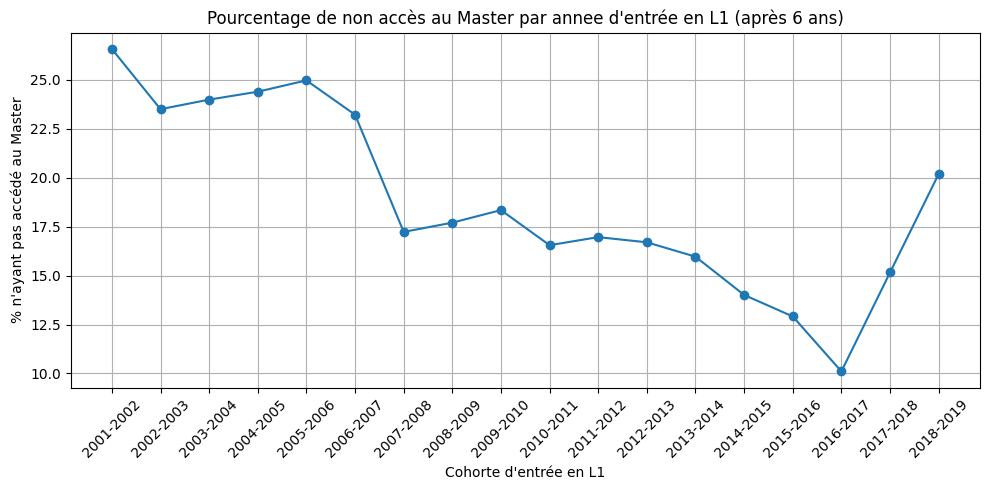

In [ ]:
niveaux_finaux = ['M1', 'M2', '5A', 'Master', 'Doctorat', 'D', '6A', '7A', '8A', '9A', '10A', '11A', '12A']

# 1. Trouver la premi√®re inscription en L1 pour chaque √©tudiant
df_l1 = df_total[df_total['NIVEAU LMD ET NON LMD'].str.contains('L1|1A', na=False)]
premiere_l1 = df_l1.groupby('NUMERO')['ANNEE_UNIVERSITAIRE'].min().reset_index()
premiere_l1 = premiere_l1.rename(columns={'ANNEE_UNIVERSITAIRE': 'ANNEE_L1'})

# 2. Ajouter cette info au dernier passage de chaque √©tudiant
dernier_passage = df_total.sort_values('ANNEE_UNIVERSITAIRE').groupby('NUMERO').tail(1)
dernier_passage = dernier_passage.merge(premiere_l1, on='NUMERO', how='left')

# 3. Calculer le nombre d'ann√©es √©coul√©es depuis la L1
dernier_passage['ANNEE_L1_NUM'] = dernier_passage['ANNEE_L1'].str[:4].astype(float)
dernier_passage['ANNEE_DERNIERE'] = dernier_passage['ANNEE_UNIVERSITAIRE'].str[:4].astype(float)
dernier_passage['ANNEES_ECOULEES'] = dernier_passage['ANNEE_DERNIERE'] - dernier_passage['ANNEE_L1_NUM']

# 4. Pour chaque cohorte d'entr√©e (ann√©e de L1)
resultats = []
for annee_cohorte in sorted(premiere_l1['ANNEE_L1'].dropna().unique()):
    annee_num = float(annee_cohorte[:4])
    # S√©lectionner les √©tudiants de cette cohorte
    cohort = dernier_passage[dernier_passage['ANNEE_L1'] == annee_cohorte]
    # Garder seulement ceux qui ont eu au moins entre 3 et 6 ans d'√©tudes
    cohort = cohort[cohort['ANNEES_ECOULEES'] >= 6]
    if len(cohort) == 0:
        continue
    # Compter ceux qui n'ont pas atteint M1 ou plus
    non_master = cohort[~cohort['NIVEAU LMD ET NON LMD'].str.contains('|'.join(niveaux_finaux), na=False)]
    nb_total = cohort['NUMERO'].nunique()
    nb_non_master = non_master['NUMERO'].nunique()
    pourcentage_non_master = 100 * nb_non_master / nb_total if nb_total > 0 else 0
    resultats.append({
        'Cohorte_L1': annee_cohorte,
        'Nb_total': nb_total,
        'Nb_non_master': nb_non_master,
        'Pourcentage_non_master': pourcentage_non_master
    })

# 5. Afficher le tableau r√©capitulatif
df_resultats = pd.DataFrame(resultats)
print(df_resultats)

# 6. Visualisation (optionnelle)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(df_resultats['Cohorte_L1'], df_resultats['Pourcentage_non_master'], marker='o')
plt.title("Pourcentage de non acc√®s au Master par annee d'entr√©e en L1 (apr√®s 6 ans)")
plt.xlabel("Cohorte d'entr√©e en L1")
plt.ylabel("% n'ayant pas acc√©d√© au Master")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout() 
plt.show()
# ...existing code...

La part d'√©tudiants n'atteignant pas le Master apr√®s 6 ans a fortement diminu√© √† l'UCAD au fil des promotions, ce qui traduit une am√©lioration globale de la r√©ussite et de la progression acad√©mique.

#### √©volution des effectifs par formation

objetif : nous analysons l‚Äô√©volution des inscriptions par fili√®re et d√©partement sur les 25 derni√®res ann√©es

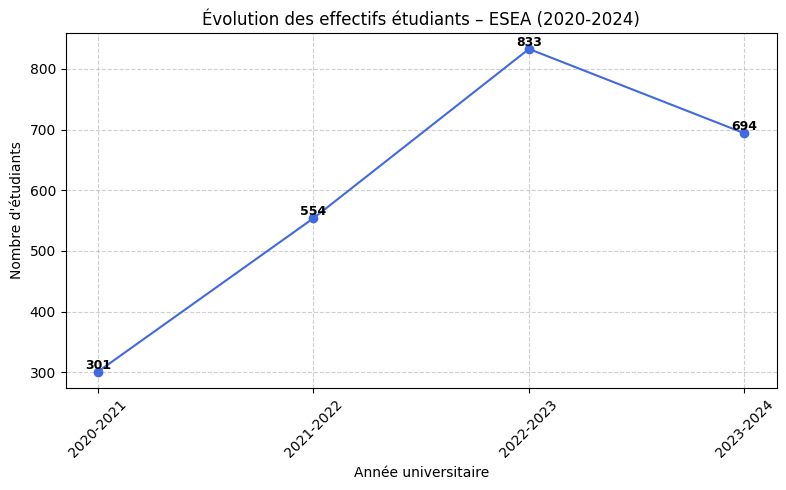

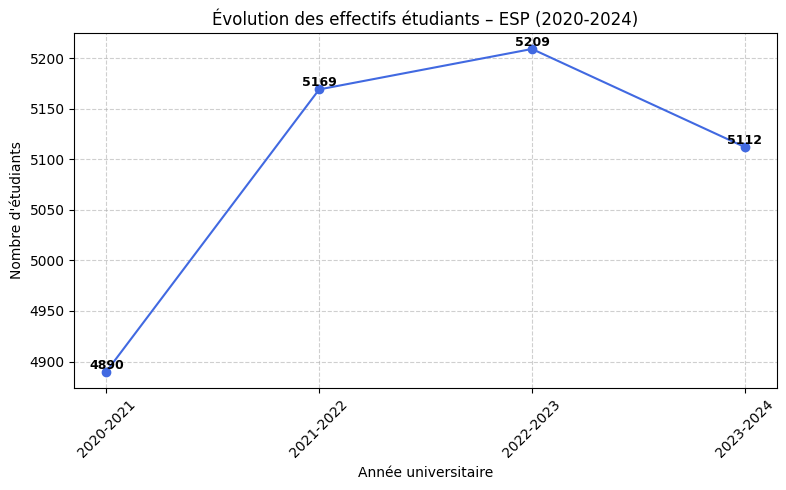

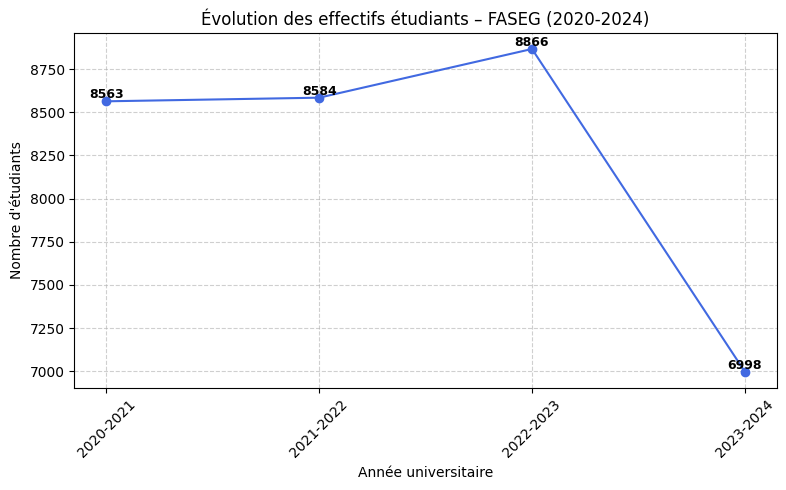

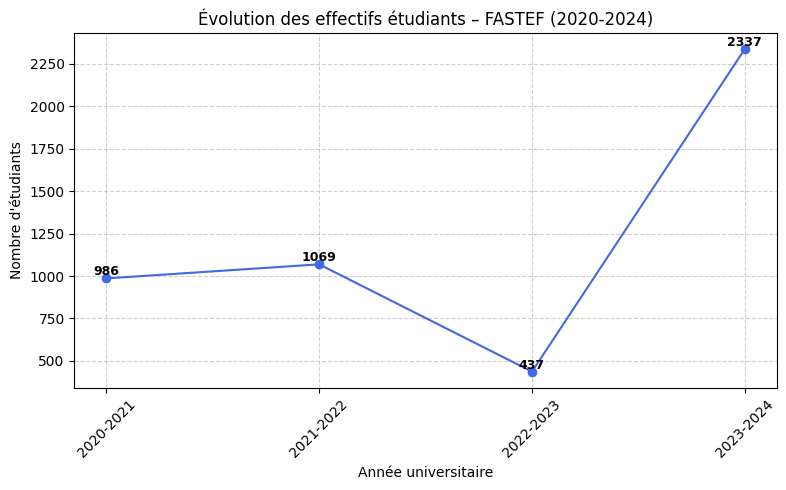

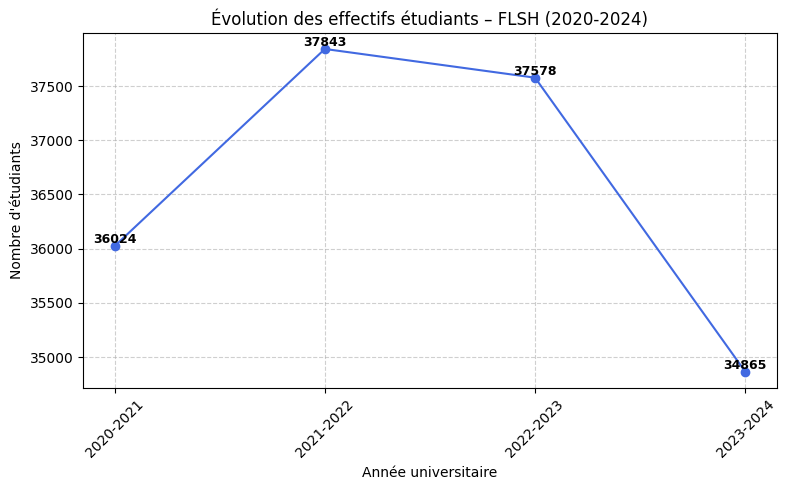

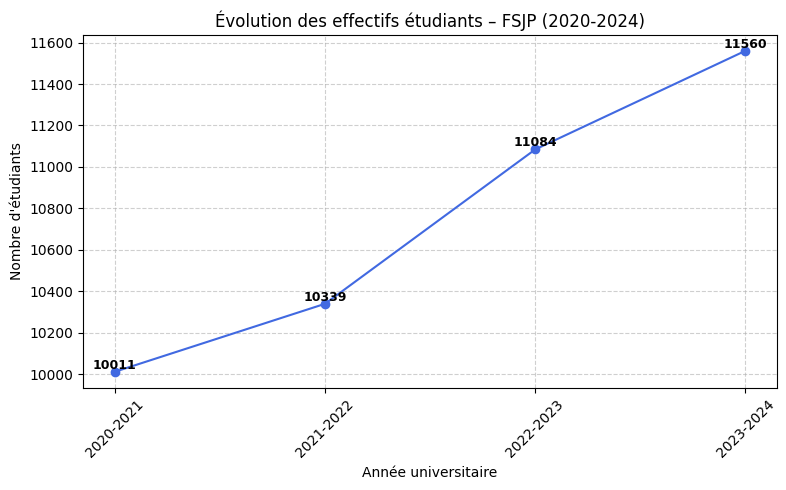

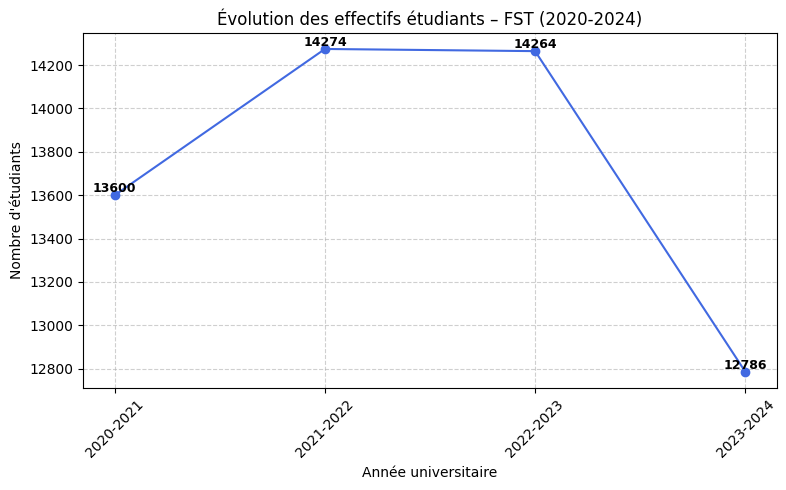

In [25]:
# === √âvolution des effectifs par facult√© √† l'UCAD (2020-2024) ===

import matplotlib.pyplot as plt

# Liste des codes des facult√©s principales
etablissement_code = ['FST', 'FLSH', 'FASEG', 'FMPOS', 'FASTEF', 'FSJP', 'ESP', 'ESEA']

# Filtrer sur les ann√©es r√©centes et les facult√©s
annees_etude = [ '2020-2021', '2021-2022', '2022-2023', '2023-2024']
df_2020_2024 = df_total[
    (df_total['ETABLISSMENT_CODE'].isin(etablissement_code)) &
    (df_total['ANNEE_UNIVERSITAIRE'].isin(annees_etude))
]

# Compter le nombre d'√©tudiants par facult√© et par ann√©e universitaire
effectifs_par_formation = (
    df_2020_2024
    .groupby(['ANNEE_UNIVERSITAIRE', 'ETABLISSMENT_CODE'])['NUMERO']
    .count()
    .reset_index()
    .rename(columns={'NUMERO': "Effectif"})
)

# Visualiser l'√©volution des effectifs pour chaque facult√©
facultes = effectifs_par_formation['ETABLISSMENT_CODE'].unique()

for fac in facultes:
    data_fac = effectifs_par_formation[effectifs_par_formation['ETABLISSMENT_CODE'] == fac]
    plt.figure(figsize=(8, 5))
    plt.plot(data_fac['ANNEE_UNIVERSITAIRE'], data_fac['Effectif'], marker='o', color='royalblue')
    # Afficher les valeurs sur le graphe
    for i, val in enumerate(data_fac['Effectif']):
        plt.text(data_fac['ANNEE_UNIVERSITAIRE'].iloc[i], val, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')
    plt.title(f"√âvolution des effectifs √©tudiants ‚Äì {fac} (2020-2024)")
    plt.xlabel("Ann√©e universitaire")
    plt.ylabel("Nombre d'√©tudiants")
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


#### √âvolution temporelle des inscriptions 

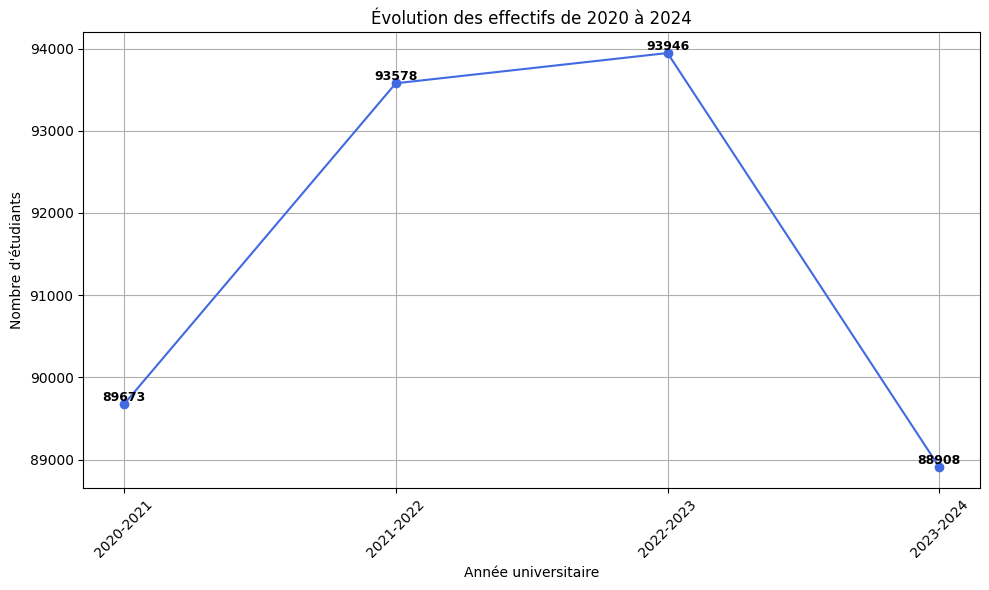

In [26]:
#===evolution des effectifs  de 2020 a 2024 ==========
df_2020_2024 = df_total[df_total['ANNEE_UNIVERSITAIRE'].isin(['2020-2021', '2021-2022', '2022-2023', '2023-2024'])]
# Compter le nombre d'√©tudiants de 2020 √† 2024
effectifs = df_2020_2024.groupby('ANNEE_UNIVERSITAIRE')['NUMERO'].count().reset_index()
# Visualisation
plt.figure(figsize=(10, 6))
plt.plot(effectifs['ANNEE_UNIVERSITAIRE'], effectifs['NUMERO'], marker='o', color='royalblue')
for i, val in enumerate(effectifs['NUMERO']):
    plt.text(effectifs['ANNEE_UNIVERSITAIRE'].iloc[i], val, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')
plt.title("√âvolution des effectifs de 2020 √† 2024")
plt.xlabel("Ann√©e universitaire")
plt.ylabel("Nombre d'√©tudiants")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show() 


#### Corr√©lation entre s√©rie Bac  mention finale(test du chi2)

0.0
Il y a une association significative entre la s√©rie de Bac et la mention du Bac car p < 0.05.


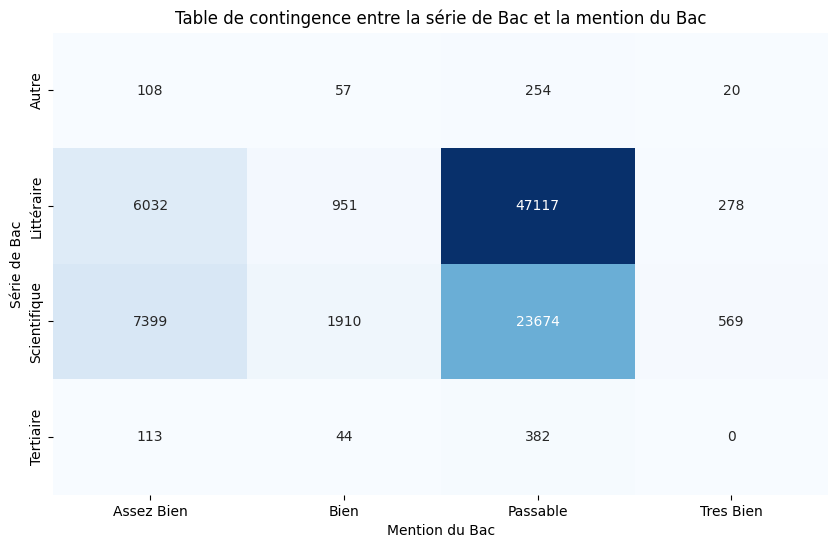

In [27]:
#===evolution des effectifs  de 2001 a 2024 ==========
#test du chi2 entre seri de bac et mention du bac 

test = pd.crosstab(df_2023['BAC_TYPE'], df_2023['MENTION_BAC_NORM'])
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(test)
print(p)
if p < 0.05:
    print("Il y a une association significative entre la s√©rie de Bac et la mention du Bac car p < 0.05.")
else: 
    print("Il n'y a pas d'association significative entre la s√©rie de Bac et la mention du Bac.") 
    
#table de contingence
table_contingence = pd.crosstab(df_2023['BAC_TYPE'], df_2023['MENTION_BAC_NORM'])
#visualisation
plt.figure(figsize=(10, 6))
sns.heatmap(table_contingence, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Table de contingence entre la s√©rie de Bac et la mention du Bac")
plt.xlabel("Mention du Bac")
plt.ylabel("S√©rie de Bac")
plt.show() 



#### Impact du d√©lai Bac-Universit√© sur la r√©ussite acad√©mique

In [28]:
#prendre les etudiants en l1 en 2017-2018 
df_2017_2018 = df_total[df_total['ANNEE_UNIVERSITAIRE'] == '2017-2018'] 
df_2017_2018_L1 = df_2017_2018[df_2017_2018['NIVEAU LMD'] == 'L1']
df_2017_2018_L1.head()



NUMERO  NUMERO_TABLE           INE NUMERO_IDENTITIFICATION  \
960319  .19950048N           NaN           NaN          .1212197100346   
960328  .200201HWU           NaN           NaN          .1598199200123   
960353  .200602PH1           NaN           NaN          .2070198400529   
960357  .2007032N5           NaN           NaN          .1392198400987   
960534  .201305RH5           NaN  N07001820131          .1564200100478   

           NOM          PRENOM DATE_DE_NAISSANCE LIEU_DE_NAISSANCE  \
960319    NGOM       Jacob S√™q        1971-02-03          DIOURBEL   
960328    NGOM        Ibrahima        1981-02-06        NDIANDIAYE   
960353  NDIAYE            Sir√©               NaT        ZIGUINCHOR   
960357   CISSE  Amadou Tidiane               NaT       TAMBACOUNDA   
960534    DIAW       Aboubacar               NaT      NIORO DU RIP   

                     MAIL_INSTITUTIONNEL SEXE MENTION_BACC  ANNEE_BACC  \
960319         jacobseq.ngom@ucad.edu.sn    M           PA      1993.0   
960328       ibrahima57.ngom@ucad.edu.sn    M           PA      2002.0   
960353          sire3.ndiaye@ucad.edu.sn    F           PA      2006.0   
960357  amadoutidiane1.cisse@ucad.edu.sn    M           PA      2007.0   
960534       aboubacar2.diaw@ucad.edu.sn    M           PA      2013.0   

       PAYS_DE_NAISSANCE  NATIONALITE SERIE_BACC REGION_DE_NAISSANCE  \
960319           S√©n√©gal  S√©n√©galaise         A3            Diourbel   
960328           S√©n√©gal  S√©n√©galaise        L'1               Thi√®s   
960353           S√©n√©gal  S√©n√©galaise        L'1          Ziguinchor   
960357           S√©n√©gal  S√©n√©galaise        L'1         Tambacounda   
960534           S√©n√©gal  S√©n√©galaise         L2             Kaolack   

       ETABLISSMENT_CODE                                      ETABLISSEMENT  \
960319              FSJP      Facult√© des Sciences Juridiques et Politiques   
960328            FASTEF  Facult√© des Sciences et Technologies de l'Educ...   
960353            FASTEF  Facult√© des Sciences et Technologies de l'Educ...   
960357              FSJP      Facult√© des Sciences Juridiques et Politiques   
960534            ENSETP  Ecole Normale Sup√©rieure d'Enseignement Techni...   

                                           NIVEAU_SECTION  \
960319                      Licence 1 Sciences Juridiques   
960328  Premi√®re Ann√©e du CAE-CEM en Lettres Histoire ...   
960353  Premi√®re Ann√©e du CAE-CEM en Lettres Histoire ...   
960357              Licence 1 Sciences Juridiques(2)(FAD)   
960534                       Licence 1 Banque - Assurance   

                         SIGLE_NIVEAU_SECTION COHORTE ETAT_INSCRIPTION  \
960319          Licence 1 Sciences Juridiques       A       Inscrit(e)   
960328  F1C1 Lettres Histoire G√©ographie(FAD)     NaN       Inscrit(e)   
960353  F1C1 Lettres Histoire G√©ographie(FAD)     NaN       Inscrit(e)   
960357  Licence 1 Sciences Juridiques(2)(FAD)     NaN       Inscrit(e)   
960534           Licence 1 Banque - Assurance     NaN       Inscrit(e)   

        ANNEE_INSCRIPTION ANNEE_UNIVERSITAIRE TYPE_FORMATION  CODE_NIVEAU  \
960319               2018           2017-2018              I            1   
960328               2018           2017-2018              I            1   
960353               2018           2017-2018              I            1   
960357               2018           2017-2018              C            1   
960534               2018           2017-2018              C            1   

                 NIVEAU DATE_INSCRIPTION NIVEAU LMD NIVEAU LMD ET NON LMD  \
960319  Premi√®re Ann√©e        2018-01-18         L1                    L1   
960328  Premi√®re Ann√©e        2017-12-08         L1                    L1   
960353  Premi√®re Ann√©e        2017-11-03         L1                    L1   
960357  Premi√®re Ann√©e        2018-01-29         L1                    L1   
960534  Premi√®re Ann√©e        2018-03-06         L1                    L1   

       SYST

In [29]:
df_2017_2018_L1["delai_bac_univ"] = df_2017_2018_L1["ANNEE_INSCRIPTION"] - df_2017_2018_L1["ANNEE_BACC"]
df_2017_2018_L1["delai_bac_univ"].describe() 

C:\Users\HP\AppData\Local\Temp\ipykernel_1888\2134977254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017_2018_L1["delai_bac_univ"] = df_2017_2018_L1["ANNEE_INSCRIPTION"] - df_2017_2018_L1["ANNEE_BACC"]


count    21693.000000
mean         1.557553
std         18.508668
min         -4.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       1923.000000
Name: delai_bac_univ, dtype: float64

In [30]:
#======filter =============
code_niveau_mapping = {
    'L1': 1,
    'L2': 2,
    'L3': 3,
    'M1': 4,
    'M2': 5,
}
df_2017_2018_L1['CODE_NIVEAU'] = df_2017_2018_L1['NIVEAU LMD'].map(code_niveau_mapping)
df_2017_2018_L1["delai_bac_univ"] = df_2017_2018_L1["delai_bac_univ"].astype(int)
df_2017_2018_L1 = df_2017_2018_L1[df_2017_2018_L1["delai_bac_univ"] > 0]
df_2017_2018_L1 = df_2017_2018_L1[df_2017_2018_L1["delai_bac_univ"] < 10]
df_2017_2018_L1["delai_bac_univ"].describe()

C:\Users\HP\AppData\Local\Temp\ipykernel_1888\2154161684.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017_2018_L1['CODE_NIVEAU'] = df_2017_2018_L1['NIVEAU LMD'].map(code_niveau_mapping)
C:\Users\HP\AppData\Local\Temp\ipykernel_1888\2154161684.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017_2018_L1["delai_bac_univ"] = df_2017_2018_L1["delai_bac_univ"].astype(int)


count    21544.000000
mean         1.276597
std          0.563918
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          9.000000
Name: delai_bac_univ, dtype: float64

objectif : L'objectif de cette analyse est de d√©tecter √† partir de quelle ann√©e universitaire les inscriptions dans les universit√©s ont commenc√© √† √™tre significativement d√©cal√©es dans le temps

       NUMERO DATE_INSCRIPTION
0  .199900UB6       2001-12-11
1  .199800OAE       2001-12-12
2  .199700H5O       2001-11-10
3  .199700I36       2002-02-01
4  .199800NC9       2001-11-19
5  .199900TPD       2002-03-07
6  .199900TZS       2001-12-04
7  .199900U28       2001-11-14
8  .1995000ZR       2002-01-17
9  .19950009W       2001-12-04


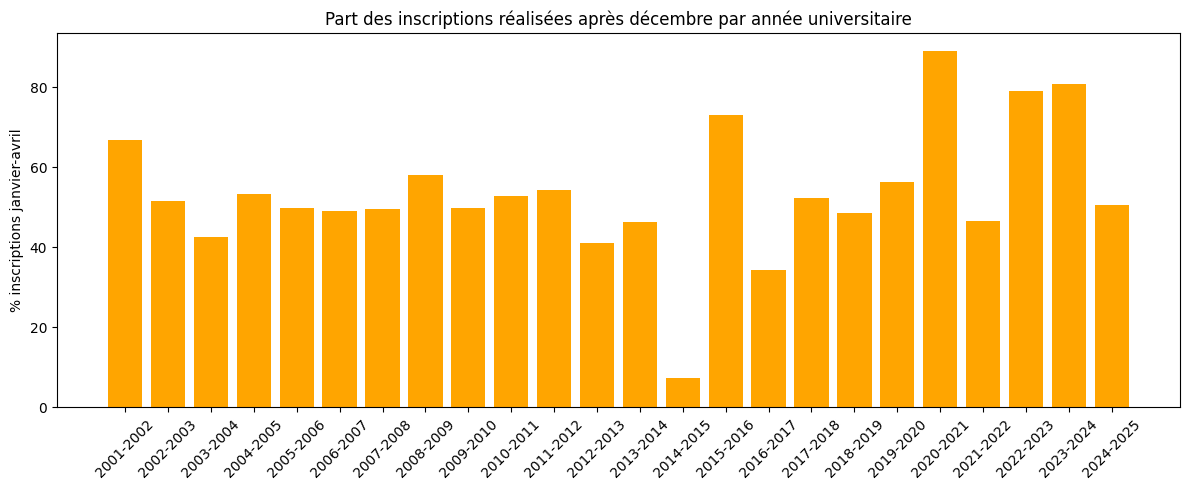

Empty DataFrame
Columns: [DATE_INSCRIPTION, source, NUMERO, NOM, PRENOM]
Index: []


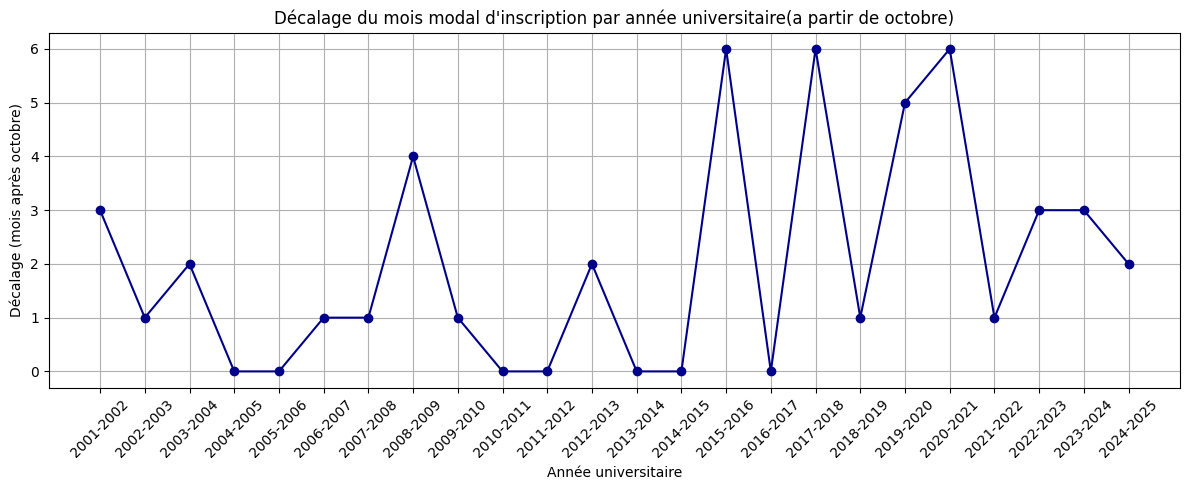

In [31]:


# Conversion correcte juste apr√®s la concat√©nation !
df_total['DATE_INSCRIPTION'] = pd.to_datetime(df_total['DATE_INSCRIPTION'], dayfirst=True, errors='coerce')
print(df_total[['NUMERO', 'DATE_INSCRIPTION']].head(10))

# Ne garder que les ann√©es universitaires plausibles (ex: >= 2000)
annee_min = 2000
df_total = df_total[df_total['DATE_INSCRIPTION'].dt.year >= annee_min]

# D√©finir l'ann√©e universitaire selon la logique UCAD
def get_annee_universitaire(date):
    if pd.isnull(date):
        return None
    if date.month >= 10:  # Octobre √† D√©cembre
        return f"{date.year}-{date.year + 1}"
    elif 1 <= date.month <= 4:  # Janvier √† Avril (retard sur l'ann√©e pr√©c√©dente)
        return f"{date.year - 1}-{date.year}"
    else:  # Mai √† Septembre : inscription trop tardive ou anomalie
        return None

df_total['ANNEE_UNIVERSITAIRE'] = df_total['DATE_INSCRIPTION'].apply(get_annee_universitaire)
df_total = df_total.dropna(subset=['ANNEE_UNIVERSITAIRE'])

# On ne garde que les inscriptions d'octobre √† avril (p√©riode normale)
df_total = df_total[df_total['DATE_INSCRIPTION'].dt.day.isin([10,11,12,1,2,3,4])]

# Pourcentage d'inscriptions apr√®s d√©cembre (janvier √† avril) pour chaque ann√©e universitaire
df_total['MOIS_INSCRIPTION'] = df_total['DATE_INSCRIPTION'].dt.day
annees = sorted(df_total['ANNEE_UNIVERSITAIRE'].unique())
pourcentages = []
for annee in annees:
    total = len(df_total[df_total['ANNEE_UNIVERSITAIRE'] == annee])
    apres_dec = len(df_total[(df_total['ANNEE_UNIVERSITAIRE'] == annee) & (df_total['MOIS_INSCRIPTION'].isin([1,2,3,4]))])
    pct = 100 * apres_dec / total if total > 0 else 0
    pourcentages.append(pct)

plt.figure(figsize=(12, 5))
plt.bar(annees, pourcentages, color='orange')
plt.xticks(rotation=45)
plt.ylabel("% inscriptions janvier-avril")
plt.title("Part des inscriptions r√©alis√©es apr√®s d√©cembre par ann√©e universitaire")
plt.tight_layout()
plt.show()

# D√©calage du mois modal d'inscription
mois_mode_par_annee = (
    df_total.groupby('ANNEE_UNIVERSITAIRE')['DATE_INSCRIPTION']
    .agg(lambda x: x.dt.day.mode().iloc[0])
    .reset_index()
)
mois_mode_par_annee = mois_mode_par_annee.rename(columns={'DATE_INSCRIPTION': 'MOIS_MODAL'})

def decalage_depuis_octobre(mois_modal):
    if mois_modal >= 10:
        return mois_modal - 10 
    else:
        return mois_modal + 2  # Janvier=1 => 3 mois apr√®s octobre

mois_mode_par_annee['DECALAGE_MOIS'] = mois_mode_par_annee['MOIS_MODAL'].apply(decalage_depuis_octobre)
df_avril = df_total[df_total['DATE_INSCRIPTION'].dt.year == 4][['DATE_INSCRIPTION', 'source', 'NUMERO', 'NOM', 'PRENOM']]
print(df_avril.head(20))

plt.figure(figsize=(12, 5))
plt.plot(mois_mode_par_annee['ANNEE_UNIVERSITAIRE'], mois_mode_par_annee['DECALAGE_MOIS'], marker='o', color='darkblue')
plt.title("D√©calage du mois modal d'inscription par ann√©e universitaire(a partir de octobre)")
plt.xlabel("Ann√©e universitaire")
plt.ylabel("D√©calage (mois apr√®s octobre)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



L'analyse montre que le d√©calage des inscriptions universitaires √† l'UCAD est devenu significatif √† partir de certaines ann√©es, avec une part importante d‚Äô√©tudiants s‚Äôinscrivant apr√®s d√©cembre jusqu'√† janvier, f√©vrier, voire plus tard

#### chamgement de filiere

In [32]:
#detecter les etudiants qui chage de formation
# D√©tecter les √©tudiants qui changent de formation (d√©partement) au cours de leur parcours

# 1. Trier les donn√©es par √©tudiant et par ann√©e universitaire
df_total_sorted = df_total.sort_values(['NUMERO', 'ANNEE_UNIVERSITAIRE'])

# 2. Pour chaque √©tudiant, comparer le d√©partement d'une ann√©e √† l'autre
df_total_sorted['CHANGEMENT_FORMATION'] = (
    df_total_sorted.groupby('NUMERO')['DEPARTEMENT FORMATION']
    .transform(lambda x: x != x.shift())
)

# 3. Un √©tudiant a chang√© de formation s'il a au moins deux d√©partements diff√©rents
changement_etudiants = (
    df_total.groupby('NUMERO')['DEPARTEMENT FORMATION']
    .nunique()
    .reset_index(name='NB_FORMATIONS')
)
changement_etudiants['A_CHANGE_FORMATION'] = (changement_etudiants['NB_FORMATIONS'] > 1).astype(int)

# 4. Pourcentage d'√©tudiants ayant chang√© de formation
pourcentage_changement = 100 * changement_etudiants['A_CHANGE_FORMATION'].mean()
print(f"Pourcentage d'√©tudiants ayant chang√© de formation : {pourcentage_changement:.2f}%")

# 5. (Optionnel) Lister les √©tudiants concern√©s
etudiants_ayant_change = changement_etudiants[changement_etudiants['A_CHANGE_FORMATION'] == 1]



Pourcentage d'√©tudiants ayant chang√© de formation : 6.87%


R√©partition par sexe :
SEXE
M    68.4%
F    31.6%
Name: proportion, dtype: object

R√©partition par mention au Bac :
MENTION_BACC
PA    86.5%
AB     9.9%
BI     2.9%
TB     0.6%
Name: proportion, dtype: object

R√©partition par type de Bac :
BAC_TYPE
Scientifique    50.7%
Litt√©raire      45.5%
Tertiaire        2.4%
Autre            1.3%
Name: proportion, dtype: object

R√©partition par tranche d'√¢ge √† l'inscription :
TRANCHE_AGE
27-30    35.4%
24-26    29.3%
31-40    19.9%
21-23    11.3%
40+       3.4%
18-20     0.7%
<18       0.0%
Name: proportion, dtype: object

R√©partition par r√©gion de naissance (top 5) :
REGION_DE_NAISSANCE
Dakar         36.0%
Thi√®s         15.5%
Kaolack        9.8%
Ziguinchor     7.1%
Fatick         7.1%
Name: proportion, dtype: object

Comparaison avec la population totale (sexe) :
SEXE
M    63.1%
F    36.9%
Name: proportion, dtype: object


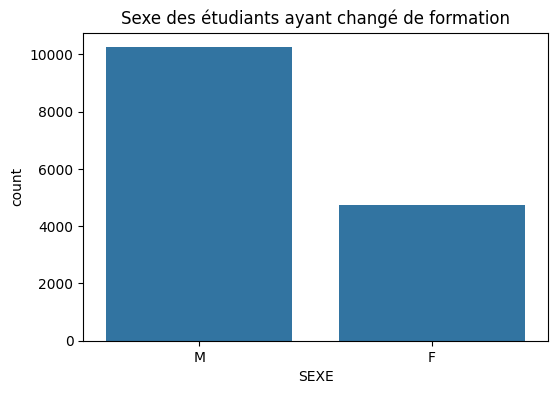

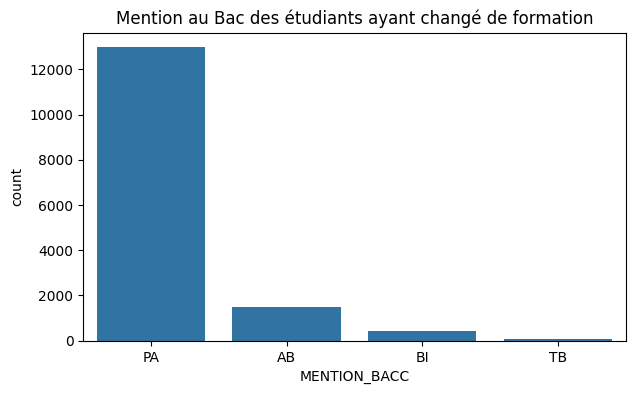

In [33]:
# Analyse approfondie : Profil des √©tudiants qui changent de formation

# 1. R√©cup√©rer les NUMERO des √©tudiants ayant chang√© de formation
etudiants_ayant_change_ids = etudiants_ayant_change['NUMERO']

# 2. Extraire leurs informations d√©mographiques et acad√©miques (derni√®re inscription connue)
profil_changement = df_total[df_total['NUMERO'].isin(etudiants_ayant_change_ids)]
profil_changement_last = profil_changement.sort_values('ANNEE_UNIVERSITAIRE').groupby('NUMERO').tail(1)

# 3. Statistiques descriptives sur ce sous-groupe
print("R√©partition par sexe :")
print(profil_changement_last['SEXE'].value_counts(normalize=True).map("{:.1%}".format))

print("\nR√©partition par mention au Bac :")
print(profil_changement_last['MENTION_BACC'].value_counts(normalize=True).map("{:.1%}".format))

print("\nR√©partition par type de Bac :")
if 'BAC_TYPE' in profil_changement_last.columns:
    print(profil_changement_last['BAC_TYPE'].value_counts(normalize=True).map("{:.1%}".format))
else:
    print(profil_changement_last['SERIE_BACC'].value_counts(normalize=True).map("{:.1%}".format))

print("\nR√©partition par tranche d'√¢ge √† l'inscription :")
if 'AGE_INSCRIPTION' in profil_changement_last.columns:
    bins = [0, 17, 20, 23, 26, 30, 40, 100]
    labels = ['<18', '18-20', '21-23', '24-26', '27-30', '31-40', '40+']
    profil_changement_last['TRANCHE_AGE'] = pd.cut(profil_changement_last['AGE_INSCRIPTION'], bins=bins, labels=labels, right=False)
    print(profil_changement_last['TRANCHE_AGE'].value_counts(normalize=True).map("{:.1%}".format))

print("\nR√©partition par r√©gion de naissance (top 5) :")
print(profil_changement_last['REGION_DE_NAISSANCE'].value_counts(normalize=True).head(5).map("{:.1%}".format))

# 4. Comparaison avec la population totale
print("\nComparaison avec la population totale (sexe) :")
print(df_total['SEXE'].value_counts(normalize=True).map("{:.1%}".format))


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=profil_changement_last, x='SEXE')
plt.title("Sexe des √©tudiants ayant chang√© de formation")
plt.show()

plt.figure(figsize=(7,4))
sns.countplot(data=profil_changement_last, x='MENTION_BACC', order=['PA','AB','BI','TB'])
plt.title("Mention au Bac des √©tudiants ayant chang√© de formation")
plt.show()

#### suivre cohorte


In [2]:
import pandas as pd
resultats = pd.read_csv("C:/Users/HP/Downloads/df_inscrit_resultat.csv")

C:\Users\HP\AppData\Local\Temp\ipykernel_15232\2318457313.py:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  resultats = pd.read_csv("C:/Users/HP/Downloads/df_inscrit_resultat.csv")


In [4]:
resultats.head( )

NUMERO      NOM                  PRENOM DATE_DE_NAISSANCE  \
0  19950018H    NIANG             Papa Massal        13/04/1968   
1  199700AUY  GASSAMA                   Fatou        26/12/1977   
2  199900QF3     NGOM                 Mamadou        21/03/1977   
3  199900RLX     SANE           Pape Ibrahima        17/04/1979   
4  199900RMH     LEYE  Mamadou Makhtar Mback√©        12/01/1980   

  LIEU_DE_NAISSANCE SEXE MENTION_BACC  ANNEE_BACC  NATIONALITE SERIE_BACC  \
0       TAMBACOUMBA    M           PA      1990.0  S√©n√©galaise        NaN   
1             DAKAR    F           PA      1995.0  S√©n√©galaise          D   
2             DAKAR    M           PA      1999.0  S√©n√©galaise         L2   
3        ZIGUINCHOR    M           PA      1999.0  S√©n√©galaise         S2   
4            BAMBEY    M           PA      1999.0  S√©n√©galaise         S2   

   ... DATE_INSCRIPTION NIVEAU LMD NIVEAU LMD ET NON LMD    SYSTEME  \
0  ...       29/12/2010        NaN                    3A  Classique   
1  ...       28/12/2010        NaN                    8A  Classique   
2  ...       23/12/2010        NaN                    3A  Classique   
3  ...       04/12/2010         M2                    M2        LMD   
4  ...       24/11/2010        NaN                    8A  Classique   

                       DEPARTEMENT FORMATION  CREDIT SESSION MENTION  \
0                                        ...     NaN     NaN     NaN   
1  M√©decine interne et Sp√©cialit√©s m√©dicales     NaN     NaN     NaN   
2                                        ...     NaN     NaN     NaN   
3  M√©decine interne et Sp√©cialit√©s m√©dicales     NaN     NaN     NaN   
4  M√©decine interne et Sp√©cialit√©s m√©dicales     NaN     NaN     NaN   

   MOYENNE ANNUELLE RESULTAT  
0               NaN      NaN  
1               NaN      NaN  
2               NaN      NaN  
3               NaN      NaN  
4               NaN      NaN  

[5 rows x 30 columns]

In [5]:
resultats.isnull().sum()

NUMERO                        0
NOM                           0
PRENOM                        0
DATE_DE_NAISSANCE             0
LIEU_DE_NAISSANCE           241
SEXE                          0
MENTION_BACC               6303
ANNEE_BACC                 4946
NATIONALITE                   0
SERIE_BACC                32312
ETABLISSMENT_CODE             0
ETABLISSEMENT                 0
NIVEAU_SECTION                0
SIGLE_NIVEAU_SECTION          0
ETAT_INSCRIPTION              0
ANNEE_INSCRIPTION             0
ANNEE UNIVERSITAIRE           0
TYPE_FORMATION                0
CODE_NIVEAU                   0
NIVEAU                        0
DATE_INSCRIPTION              0
NIVEAU LMD               193218
NIVEAU LMD ET NON LMD         0
SYSTEME                       0
DEPARTEMENT FORMATION         0
CREDIT                   495157
SESSION                  465639
MENTION                  926097
MOYENNE ANNUELLE         505947
RESULTAT                 465639
dtype: int64

In [6]:
#remplacer les non null par abadon 
resultats['RESULTAT'] = resultats['RESULTAT'].fillna('ABANDON')
resultats['RESULTAT'].value_counts()

RESULTAT
ABANDON                          465639
Redouble                         266958
Passe                            187522
Exclu                             87153
A obtenu le dipl√¥me               67247
Autoris√© √† passer                 61993
Ann√©e valid√©e                     41690
Ann√©e non valid√©e                 35546
Autoris√© √† faire la session 2      2034
En attente de d√©lib√©ration           55
Name: count, dtype: int64

In [7]:
resultats.isnull().sum() / len(resultats) * 100

NUMERO                    0.000000
NOM                       0.000000
PRENOM                    0.000000
DATE_DE_NAISSANCE         0.000000
LIEU_DE_NAISSANCE         0.019822
SEXE                      0.000000
MENTION_BACC              0.518408
ANNEE_BACC                0.406798
NATIONALITE               0.000000
SERIE_BACC                2.657593
ETABLISSMENT_CODE         0.000000
ETABLISSEMENT             0.000000
NIVEAU_SECTION            0.000000
SIGLE_NIVEAU_SECTION      0.000000
ETAT_INSCRIPTION          0.000000
ANNEE_INSCRIPTION         0.000000
ANNEE UNIVERSITAIRE       0.000000
TYPE_FORMATION            0.000000
CODE_NIVEAU               0.000000
NIVEAU                    0.000000
DATE_INSCRIPTION          0.000000
NIVEAU LMD               15.891768
NIVEAU LMD ET NON LMD     0.000000
SYSTEME                   0.000000
DEPARTEMENT FORMATION     0.000000
CREDIT                   40.725607
SESSION                  38.297815
MENTION                  76.169503
MOYENNE ANNUELLE    

In [8]:
resultats['RESULTAT'].value_counts(normalize=True).map("{:.1%}".format)

RESULTAT
ABANDON                          38.3%
Redouble                         22.0%
Passe                            15.4%
Exclu                             7.2%
A obtenu le dipl√¥me               5.5%
Autoris√© √† passer                 5.1%
Ann√©e valid√©e                     3.4%
Ann√©e non valid√©e                 2.9%
Autoris√© √† faire la session 2     0.2%
En attente de d√©lib√©ration        0.0%
Name: proportion, dtype: object

In [9]:
resultats["SERIE_BACC"].value_counts(normalize=True).map("{:.1%}".format)

SERIE_BACC
S2       30.1%
L2       30.1%
L'1      27.5%
G         3.0%
D         1.9%
LAR       1.8%
S1        1.3%
S         0.9%
STEG      0.7%
C         0.6%
A3        0.4%
A         0.4%
LA        0.3%
S3        0.2%
A4        0.1%
L'        0.1%
S2A       0.1%
B         0.1%
L1A       0.1%
T1        0.1%
a3        0.0%
SNA       0.0%
SB        0.0%
SNB       0.0%
A2        0.0%
L1B       0.0%
G2        0.0%
T2        0.0%
L         0.0%
SM        0.0%
ES        0.0%
BT        0.0%
E         0.0%
S4        0.0%
S5        0.0%
S1A       0.0%
F7        0.0%
T         0.0%
F6        0.0%
F2        0.0%
CAEP      0.0%
STIDD     0.0%
Name: proportion, dtype: object

In [ ]:


def suivi_cohorte(df, annee_bac, serie_bac, annee_univ, nb_annees=6):
    """
    Suivi d'une cohorte avec explications tr√®s simples et visuelles (emojis).
    Affiche pour chaque ann√©e et niveau :
      - ‚úÖ Passent au niveau suivant
      - üîÅ Redoublent
      - üö´ Abandonnent/Exclus
      - üéì Dipl√¥m√©s (L3)
    G√©n√®re aussi un DataFrame de synth√®se.
    """
    niveaux = ['L1', 'L2', 'L3']
    recap = []  # Pour g√©n√©rer le DataFrame r√©capitulatif
    
    # 1. S√©lection de la cohorte de d√©part (L1, ann√©e N)
    df_l1 = df[
        (df['ANNEE_BACC'] == annee_bac) &
        (df['SERIE_BACC'] == serie_bac) &
        (df['ANNEE UNIVERSITAIRE'] == annee_univ) &
        (df['NIVEAU LMD ET NON LMD'].str.contains('L1|1A', na=False))
    ]
    numeros_cohorte = set(df_l1['NUMERO'].unique())
    n_depart = len(numeros_cohorte)
    print(f"\nüöÄ D√©part {annee_univ} : {n_depart} √©tudiants inscrits en L1\n")
    
    # Pr√©parer le DataFrame pour suivi rapide
    df_suivi = df[df['NUMERO'].isin(numeros_cohorte)].copy()
    df_suivi.set_index(['NUMERO', 'ANNEE UNIVERSITAIRE'], inplace=True)
    
    # D√©marrer avec tous les √©l√®ves en L1
    groupes = {('L1', 'd√©but'): set(numeros_cohorte)}
    
    for i in range(nb_annees):
        annee_courante = str(int(annee_univ[:4]) + i) + '-' + str(int(annee_univ[5:]) + i)
        print(f"üìÖ Ann√©e scolaire : {annee_courante}")
        nouveaux_groupes = {}
        etape_annee = []
        for niveau in niveaux:
            for statut in ['d√©but', 'redouble']:
                key = (niveau, statut)
                if key not in groupes or not groupes[key]:
                    continue
                groupe = groupes[key]
                passe, redouble, abandon, diplome = set(), set(), set(), set()
                for num in groupe:
                    idx = (num, annee_courante)
                    if idx not in df_suivi.index:
                        abandon.add(num)
                        continue
                    etu = df_suivi.loc[idx]
                    if isinstance(etu, pd.DataFrame):
                        etu = etu.iloc[0]
                    res = str(etu['RESULTAT']).upper()
                    # Dipl√¥me (en L3)
                    if niveau == 'L3' and 'OBTENU' in res:
                        diplome.add(num)
                    elif any(x in res for x in ['EXCLU', 'ABANDON']):
                        abandon.add(num)
                    elif any(x in res for x in ['PASSE', 'ANN√âE VALID√âE', 'AUTORIS√â √Ä PASSER']):
                        if niveau == 'L1':
                            nouveaux_groupes.setdefault(('L2', 'd√©but'), set()).add(num)
                        elif niveau == 'L2':
                            nouveaux_groupes.setdefault(('L3', 'd√©but'), set()).add(num)
                        passe.add(num)
                    elif any(x in res for x in ['REDOUBLE', 'ANN√âE NON VALID√âE']):
                        nouveaux_groupes.setdefault((niveau, 'redouble'), set()).add(num)
                        redouble.add(num)
                    else:
                        abandon.add(num)
                # Affichage simple et visuel avec emojis
                nom_etape = niveau if statut == 'd√©but' else f"{niveau} (redoublants)"
                print(f"  - {nom_etape} :")
                print(f"      ‚úÖ {len(passe)} passent au niveau suivant")
                print(f"      üîÅ {len(redouble)} doivent refaire {niveau}")
                print(f"      üö´ {len(abandon)} arr√™tent ou quittent")
                if niveau == 'L3':
                    print(f"      üéì {len(diplome)} obtiennent leur dipl√¥me !")
                # Stocker pour DataFrame r√©cap
                recap.append({
                    'Ann√©e': annee_courante,
                    'Niveau': nom_etape,
                    'Passe': len(passe),
                    'Redouble': len(redouble),
                    'Abandon': len(abandon),
                    'Diplome': len(diplome) if niveau == 'L3' else None
                })
        groupes = nouveaux_groupes
        if not groupes:
            print("  (Plus personne √† suivre dans la cohorte)\n")
            break
        print("")  # Ligne vide entre ann√©es

    # Cr√©ation du DataFrame de synth√®se
    df_recap = pd.DataFrame(recap)
    print("\nüîé **R√©capitulatif synth√©tique** (pr√™t pour analyse ou graphique) :")
    print(df_recap.fillna(0))
    return df_recap.fillna(0)




In [40]:
suivi_cohorte(resultats, 2018, 'L2', '2018-2019')


üöÄ D√©part 2018-2019 : 5976 √©tudiants inscrits en L1

üìÖ Ann√©e scolaire : 2018-2019


C:\Users\HP\AppData\Local\Temp\ipykernel_15232\2027451627.py:46: PerformanceWarning: indexing past lexsort depth may impact performance.
  if idx not in df_suivi.index:
C:\Users\HP\AppData\Local\Temp\ipykernel_15232\2027451627.py:49: PerformanceWarning: indexing past lexsort depth may impact performance.
  etu = df_suivi.loc[idx]


  - L1 :
      ‚úÖ 2403 passent au niveau suivant
      üîÅ 3404 doivent refaire L1
      üö´ 169 arr√™tent ou quittent

üìÖ Ann√©e scolaire : 2019-2020
  - L1 (redoublants) :
      ‚úÖ 1027 passent au niveau suivant
      üîÅ 3 doivent refaire L1
      üö´ 2374 arr√™tent ou quittent
  - L2 :
      ‚úÖ 1464 passent au niveau suivant
      üîÅ 873 doivent refaire L2
      üö´ 66 arr√™tent ou quittent

üìÖ Ann√©e scolaire : 2020-2021
  - L1 (redoublants) :
      ‚úÖ 0 passent au niveau suivant
      üîÅ 0 doivent refaire L1
      üö´ 3 arr√™tent ou quittent
  - L2 :
      ‚úÖ 420 passent au niveau suivant
      üîÅ 546 doivent refaire L2
      üö´ 61 arr√™tent ou quittent
  - L2 (redoublants) :
      ‚úÖ 387 passent au niveau suivant
      üîÅ 47 doivent refaire L2
      üö´ 439 arr√™tent ou quittent
  - L3 :
      ‚úÖ 220 passent au niveau suivant
      üîÅ 497 doivent refaire L3
      üö´ 32 arr√™tent ou quittent
      üéì 715 obtiennent leur dipl√¥me !

üìÖ Ann√©e sc

Ann√©e            Niveau  Passe  Redouble  Abandon  Diplome
0   2018-2019                L1   2403      3404      169      0.0
1   2019-2020  L1 (redoublants)   1027         3     2374      0.0
2   2019-2020                L2   1464       873       66      0.0
3   2020-2021  L1 (redoublants)      0         0        3      0.0
4   2020-2021                L2    420       546       61      0.0
5   2020-2021  L2 (redoublants)    387        47      439      0.0
6   2020-2021                L3    220       497       32    715.0
7   2021-2022  L2 (redoublants)    130        11      452      0.0
8   2021-2022                L3     95       422       48    242.0
9   2021-2022  L3 (redoublants)     39        25      268    165.0
10  2022-2023  L2 (redoublants)      0         0       11      0.0
11  2022-2023                L3      4        79       12     35.0
12  2022-2023  L3 (redoublants)     12        18      251    166.0
13  2023-2024  L3 (redoublants)      0         0       95      2.0

## Insights cl√©s de l‚Äôanalyse exploratoire

## Insights cl√©s 

A partir des donn√©es √©tudi√©es,plusieurs enseignements majeurs ressortent‚ÄØ:

1. **Profil d√©mographique**  
   La r√©partition hommes/femmes est relativement √©quilibr√©e‚ÄØ: **63,1‚ÄØ% d'hommes** et **36,9‚ÄØ% de femmes** sur l'ensemble des effectifs r√©cents. L'age √† l'inscription est concentr√© entre **21 et 26 ans** (pr√®s de 60‚ÄØ% des √©tudiants), avec un pic dans la tranche **21-23 ans**. Les inscriptions apr√®s 30 ans restent marginales (moins de 5‚ÄØ%).

2. **Redoublement et r√©ussite**  
   Le **taux de redoublement en premi√®re ann√©e (L1)** atteint **37,1‚ÄØ%**. Concernant le taux d'abandon 
   lanalyse par cohorte montre une nette am√©lioration‚ÄØ: la part d'√©tudiants n'ayant pas acc√©d√© au Master apr√®s 6 ans a fortement diminu√© au fil des promotions, passant de plus de **50‚ÄØ%** pour les cohortes du d√©but des ann√©es 2000 √† moins de **15‚ÄØ%** pour les cohortes r√©centes, traduisant ainsi une progression globale de la r√©ussite acad√©mique.
   

3. **Facteurs influen√ßant la r√©ussite**  
   - **Mention au Bac**‚ÄØ: Les √©tudiants ayant la mention "Passable" au Bac redoublent plus souvent (taux de redoublement en L1 sup√©rieur √† 40‚ÄØ%), contre moins de 20‚ÄØ% pour les mentions "Bien" ou "Tr√®s Bien".
   - **S√©rie du Bac**‚ÄØ: Les s√©ries litt√©raires pr√©sentent un taux de redoublement en L1 de **44,2‚ÄØ%**, contre **33,7‚ÄØ%** pour les s√©ries scientifiques.
   - **R√©gion de naissance**‚ÄØ: Certaines r√©gions affichent un taux de redoublement sup√©rieur √† **50‚ÄØ%** comme Ziguichor , alors que d'autres sont en dessous de la moyenne 
   - **Sexe**‚ÄØ: Aucune diff√©rence significative n‚Äôa √©t√© observ√©e entre hommes et femmes concernant le redoublement en L1 (test du chi2, p-value > 0,05).

4. **√âvolution des effectifs**  
   Les effectifs √©tudiants ont fortement augment√©, passant de **environ 30‚ÄØ000** en 2001 √† un pic de **plus de 100‚ÄØ000** en 2022-2023, avant une baisse en 2024-2025. Certaines facult√©s (FST, FLSH, FASEG) concentrent la majorit√© des inscriptions.

5. **Inscription**  
   On observe un **d√©calage progressif des inscriptions**‚ÄØ: la part d'√©tudiants s'inscrivant apr√®s d√©cembre d√©passe **30‚ÄØ%** certaines ann√©es r√©centes, alors qu'elle √©tait moyenne avant 2010. Le mois modal d‚Äôinscription s'est d√©plac√© de novembre √† janvier/f√©vrier pour plusieurs cohortes.

6. **Changement de formation**  
   **7,0‚ÄØ%** des √©tudiants changent de formation au cours de leur parcours. Parmi eux‚ÄØ:
   - **68,4‚ÄØ% sont des hommes**
   - **86,5‚ÄØ%** ont obtenu la mention "Passable" au Bac
   - **35,4‚ÄØ%** avaient entre **27 et 30 ans** lors de leur inscription
   - Les profils scientifiques et litt√©raires sont presque √† √©galit√© (respectivement **50,7‚ÄØ%** et **45,5‚ÄØ%**)

---

**En r√©sum√©**‚ÄØ:  
L'UCAD fait face √† des d√©fis majeurs en mati√®re de r√©ussite et de parcours √©tudiants‚ÄØ: taux de redoublement √©lev√©, progression difficile vers le Master, disparit√©s r√©gionales et retards d‚Äôinscription. Ces constats soulignent l‚Äôimportance d‚Äôun accompagnement renforc√©, d'une meilleure orientation et dune adaptation des dispositifs d'accueil pour r√©pondre √† la diversit√© des profils √©tudiants.